# Prueba Prophet Banco del Bienestar


In [35]:
import pandas as pd
from prophet import Prophet
import pyarrow.parquet as pq
# pip install neuralprophet

# Importar el parquet desde la carpeta Insumos
df = pd.read_parquet('../Insumos/df_general.parquet')

# ============================================================
# CALENDARIOS OFICIALES COMPLETOS (nov 2023 - ene 2026)
# ============================================================

# Calendarios con fechas EXACTAS verificadas en fuentes oficiales
calendarios_exactos = {
    # Nov-Dic 2023: 6-30 noviembre
    '2023-11': [
        ('2023-11-06', ['A']),
        ('2023-11-07', ['B']),
        ('2023-11-08', ['C']),
        ('2023-11-09', ['C']),
        ('2023-11-10', ['D','E','F']),
        ('2023-11-13', ['G']),
        ('2023-11-14', ['G']),
        ('2023-11-15', ['H','I','J','K']),
        ('2023-11-16', ['L']),
        ('2023-11-17', ['M']),
        ('2023-11-21', ['M']),
        ('2023-11-22', ['N','Ñ','O']),
        ('2023-11-23', ['P','Q']),
        ('2023-11-24', ['R']),
        ('2023-11-27', ['R']),
        ('2023-11-28', ['S']),
        ('2023-11-29', ['T','U']),
        ('2023-11-30', ['V','W','X','Y','Z']),
    ],

    # Ene-Feb 2024 ELECTORAL: 29 enero - 23 febrero (pago doble mar-abr + may-jun)
    '2024-01-electoral': [
        ('2024-01-29', ['A']),
        ('2024-01-30', ['B']),
        ('2024-01-31', ['C']),
        ('2024-02-01', ['C']),
        ('2024-02-02', ['D','E','F']),
        ('2024-02-06', ['G']),
        ('2024-02-07', ['G']),
        ('2024-02-08', ['H']),
        ('2024-02-09', ['I','J','K']),
        ('2024-02-12', ['L']),
        ('2024-02-13', ['M']),
        ('2024-02-14', ['M']),
        ('2024-02-15', ['N','Ñ','O']),
        ('2024-02-16', ['P','Q']),
        ('2024-02-19', ['R']),
        ('2024-02-20', ['R']),
        ('2024-02-21', ['S']),
        ('2024-02-22', ['T','U']),
        ('2024-02-23', ['V','W','X','Y','Z']),
    ],

    # Jul-Ago 2024: 1-22 julio
    '2024-07': [
        ('2024-07-01', ['A']),
        ('2024-07-02', ['B']),
        ('2024-07-03', ['C']),
        ('2024-07-04', ['C']),
        ('2024-07-05', ['D','E','F']),
        ('2024-07-08', ['G']),
        ('2024-07-09', ['G']),
        ('2024-07-10', ['H','I','J','K']),
        ('2024-07-11', ['L']),
        ('2024-07-12', ['M']),
        ('2024-07-15', ['M']),
        ('2024-07-16', ['N','Ñ','O']),
        ('2024-07-17', ['P','Q']),
        ('2024-07-18', ['R']),
        ('2024-07-19', ['R']),
        ('2024-07-22', ['S','T','U','V','W','X','Y','Z']),
    ],

    # Sep-Oct 2024: 2-20 septiembre
    '2024-09': [
        ('2024-09-02', ['A']),
        ('2024-09-03', ['B']),
        ('2024-09-04', ['C']),
        ('2024-09-05', ['C']),
        ('2024-09-06', ['D','E','F']),
        ('2024-09-09', ['G']),
        ('2024-09-10', ['G']),
        ('2024-09-11', ['H','I','J','K']),
        ('2024-09-12', ['L']),
        ('2024-09-13', ['M']),
        ('2024-09-17', ['M']),
        ('2024-09-18', ['N','Ñ','O']),
        ('2024-09-19', ['P','Q']),
        ('2024-09-20', ['R','S','T','U','V','W','X','Y','Z']),
    ],

    # Nov-Dic 2024: 4-28 noviembre
    '2024-11': [
        ('2024-11-04', ['A']),
        ('2024-11-05', ['B']),
        ('2024-11-06', ['C']),
        ('2024-11-07', ['C']),
        ('2024-11-08', ['D','E','F']),
        ('2024-11-11', ['G']),
        ('2024-11-12', ['G']),
        ('2024-11-13', ['H','I','J','K']),
        ('2024-11-14', ['L']),
        ('2024-11-15', ['M']),
        ('2024-11-19', ['M']),
        ('2024-11-20', ['N','Ñ','O']),
        ('2024-11-21', ['P','Q']),
        ('2024-11-22', ['R']),
        ('2024-11-25', ['R']),
        ('2024-11-26', ['S']),
        ('2024-11-27', ['T','U','V']),
        ('2024-11-28', ['W','X','Y','Z']),
    ],

    # Ene-Feb 2025: 2-22 enero
    '2025-01': [
        ('2025-01-02', ['A']),
        ('2025-01-03', ['B']),
        ('2025-01-06', ['C']),
        ('2025-01-07', ['C']),
        ('2025-01-08', ['D','E','F']),
        ('2025-01-09', ['G']),
        ('2025-01-10', ['G']),
        ('2025-01-13', ['H','I','J','K']),
        ('2025-01-14', ['L']),
        ('2025-01-15', ['M']),
        ('2025-01-16', ['M']),
        ('2025-01-17', ['N','Ñ','O']),
        ('2025-01-20', ['P','Q']),
        ('2025-01-21', ['R']),
        ('2025-01-22', ['S','T','U','V','W','X','Y','Z']),
    ],

    # Mar-Abr 2025: 3-27 marzo
    '2025-03': [
        ('2025-03-03', ['A']),
        ('2025-03-04', ['B']),
        ('2025-03-05', ['C']),
        ('2025-03-06', ['C']),
        ('2025-03-07', ['D','E','F']),
        ('2025-03-10', ['G']),
        ('2025-03-11', ['G']),
        ('2025-03-12', ['H','I','J','K']),
        ('2025-03-13', ['L']),
        ('2025-03-14', ['M']),
        ('2025-03-17', ['M']),
        ('2025-03-18', ['N','Ñ','O']),
        ('2025-03-19', ['P','Q']),
        ('2025-03-20', ['R']),
        ('2025-03-24', ['R']),
        ('2025-03-25', ['S']),
        ('2025-03-26', ['T','U','V']),
        ('2025-03-27', ['W','X','Y','Z']),
    ],

    # May-Jun 2025: 7-30 mayo
    '2025-05': [
        ('2025-05-07', ['A']),
        ('2025-05-08', ['B']),
        ('2025-05-09', ['C']),
        ('2025-05-12', ['C']),
        ('2025-05-13', ['D','E','F']),
        ('2025-05-14', ['G']),
        ('2025-05-15', ['G']),
        ('2025-05-16', ['H','I','J','K']),
        ('2025-05-19', ['L']),
        ('2025-05-20', ['M']),
        ('2025-05-21', ['M']),
        ('2025-05-22', ['N','Ñ','O']),
        ('2025-05-23', ['P','Q']),
        ('2025-05-26', ['R']),
        ('2025-05-27', ['R']),
        ('2025-05-28', ['S']),
        ('2025-05-29', ['T','U','V']),
        ('2025-05-30', ['W','X','Y','Z']),
    ],

    # Jul-Ago 2025: 1-24 julio
    '2025-07': [
        ('2025-07-01', ['A']),
        ('2025-07-02', ['B']),
        ('2025-07-03', ['C']),
        ('2025-07-04', ['C']),
        ('2025-07-07', ['D','E','F']),
        ('2025-07-08', ['G']),
        ('2025-07-09', ['G']),
        ('2025-07-10', ['H','I','J','K']),
        ('2025-07-11', ['L']),
        ('2025-07-14', ['M']),
        ('2025-07-15', ['M']),
        ('2025-07-16', ['N','Ñ','O']),
        ('2025-07-17', ['P','Q']),
        ('2025-07-18', ['R']),
        ('2025-07-21', ['R']),
        ('2025-07-22', ['S']),
        ('2025-07-23', ['T','U','V']),
        ('2025-07-24', ['W','X','Y','Z']),
    ],

    # Sep-Oct 2025: 2-21 septiembre
    '2025-09': [
        ('2025-09-02', ['A']),
        ('2025-09-03', ['B']),
        ('2025-09-04', ['C']),
        ('2025-09-05', ['C']),
        ('2025-09-08', ['D','E','F']),
        ('2025-09-09', ['G']),
        ('2025-09-10', ['G']),
        ('2025-09-11', ['H','I','J','K']),
        ('2025-09-12', ['L']),
        ('2025-09-15', ['M']),
        ('2025-09-16', ['M']),
        ('2025-09-17', ['N','Ñ','O']),
        ('2025-09-18', ['P','Q']),
        ('2025-09-19', ['R']),
        ('2025-09-22', ['R','S','T','U','V','W','X','Y','Z']),
    ],

    # Nov-Dic 2025: 4-28 noviembre
    '2025-11': [
        ('2025-11-04', ['A']),
        ('2025-11-05', ['B']),
        ('2025-11-06', ['C']),
        ('2025-11-07', ['C']),
        ('2025-11-10', ['D','E','F']),
        ('2025-11-11', ['G']),
        ('2025-11-12', ['G']),
        ('2025-11-13', ['H','I','J','K']),
        ('2025-11-14', ['L']),
        ('2025-11-17', ['M']),
        ('2025-11-18', ['M']),
        ('2025-11-19', ['N','Ñ','O']),
        ('2025-11-20', ['P','Q']),
        ('2025-11-21', ['R']),
        ('2025-11-24', ['R']),
        ('2025-11-25', ['S']),
        ('2025-11-26', ['T','U','V']),
        ('2025-11-28', ['W','X','Y','Z']),
    ],

    # Ene-Feb 2026: 5-28 enero
    '2026-01': [
        ('2026-01-05', ['A']),
        ('2026-01-06', ['B']),
        ('2026-01-07', ['C']),
        ('2026-01-08', ['C']),
        ('2026-01-09', ['D','E','F']),
        ('2026-01-12', ['G']),
        ('2026-01-13', ['G']),
        ('2026-01-14', ['H','I','J','K']),
        ('2026-01-15', ['L']),
        ('2026-01-16', ['M']),
        ('2026-01-19', ['M']),
        ('2026-01-20', ['N','Ñ','O']),
        ('2026-01-21', ['P','Q']),
        ('2026-01-22', ['R']),
        ('2026-01-23', ['R']),
        ('2026-01-26', ['S']),
        ('2026-01-27', ['T','U','V']),
        ('2026-01-28', ['W','X','Y','Z']),
    ],
}

programas = ['adultos_mayores', 'discapacidad', 'madres_trabajadoras']

# OPCIÓN 1: Granular (programa_letra)
holidays_granular = []
for periodo, dias in calendarios_exactos.items():
    for fecha_str, letras in dias:
        fecha = pd.Timestamp(fecha_str)
        for programa in programas:
            for letra in letras:
                holidays_granular.append({
                    'ds': fecha,
                    'holiday': f'{programa}_{letra}',
                    'lower_window': 0,
                    'upper_window': 3
                })

holidays_df_granular = pd.DataFrame(holidays_granular)

# OPCIÓN 2: Agregado (solo programa)
holidays_agregado = []
for periodo, dias in calendarios_exactos.items():
    for fecha_str, letras in dias:
        fecha = pd.Timestamp(fecha_str)
        for programa in programas:
            holidays_agregado.append({
                'ds': fecha,
                'holiday': programa,
                'lower_window': 0,
                'upper_window': 3
            })

holidays_df_agregado = pd.DataFrame(holidays_agregado).drop_duplicates(subset=['ds','holiday'])

print("HOLIDAYS GRANULAR (programa_letra):")
print(f"  Total filas:  {len(holidays_df_granular)}")
print(f"  Tipos únicos: {holidays_df_granular['holiday'].nunique()}")
print(f"  Ejemplo: {holidays_df_granular['holiday'].unique()[:5]}")

print("\nHOLIDAYS AGREGADO (solo programa):")
print(f"  Total filas:  {len(holidays_df_agregado)}")
print(f"  Tipos únicos: {holidays_df_agregado['holiday'].nunique()}")
print(f"  Tipos: {holidays_df_agregado['holiday'].unique()}")

HOLIDAYS GRANULAR (programa_letra):
  Total filas:  1110
  Tipos únicos: 81
  Ejemplo: ['adultos_mayores_A' 'discapacidad_A' 'madres_trabajadoras_A'
 'adultos_mayores_B' 'discapacidad_B']

HOLIDAYS AGREGADO (solo programa):
  Total filas:  615
  Tipos únicos: 3
  Tipos: ['adultos_mayores' 'discapacidad' 'madres_trabajadoras']


In [36]:
# ============================================================
# FILTRAR CAJEROS ACTIVOS (CON OPERACIÓN REAL)
# ============================================================

fecha_max_base = df['fecha'].max()
margen_dias = 90  # Ventana de análisis

# Filtrar últimos 90 días
fecha_corte = fecha_max_base - pd.Timedelta(days=margen_dias)
df_reciente = df[df['fecha'] >= fecha_corte].copy()

# Calcular días con retiro > 0 en periodo reciente
actividad_reciente = (
    df_reciente[df_reciente['retiro'] > 0]
    .groupby('cajero')
    .size()
    .reset_index(name='dias_con_retiros')
)

# Cajero activo = al menos 5 días con retiros > 0 en últimos 90 días
umbral_dias_activos = 5
cajeros_activos = actividad_reciente[
    actividad_reciente['dias_con_retiros'] >= umbral_dias_activos
]['cajero'].values

cajeros_inactivos = df['cajero'].unique()
cajeros_inactivos = cajeros_inactivos[~np.isin(cajeros_inactivos, cajeros_activos)]

print(f"Cajeros activos (>={umbral_dias_activos} días con retiros en últimos {margen_dias} días): {len(cajeros_activos)}")
print(f"Cajeros inactivos: {len(cajeros_inactivos)}")

# Filtrar
df = df[df['cajero'].isin(cajeros_activos)].copy()

Cajeros activos (>=5 días con retiros en últimos 90 días): 2934
Cajeros inactivos: 27


In [37]:
import pandas as pd
import numpy as np

# ============================================================
# 1. CONSTRUCCIÓN DE MÉTRICAS POR CAJERO
# ============================================================
print("="*80)
print("CONSTRUYENDO MÉTRICAS ESTRUCTURALES POR CAJERO")
print("="*80)

# Calcular estadísticas robustas por cajero
resumen_cajero = (
    df
    .groupby("cajero")["retiro"]
    .agg(
        dias_obs="count",
        mediana="median",
        p90=lambda x: x.quantile(0.90),
        p95=lambda x: x.quantile(0.95),
    )
    .reset_index()
)

print(f"\nTotal cajeros en dataset: {len(resumen_cajero)}")
print(f"Días observados por cajero:")
print(f"  Mínimo: {resumen_cajero['dias_obs'].min()}")
print(f"  Mediana: {resumen_cajero['dias_obs'].median():.0f}")
print(f"  Máximo: {resumen_cajero['dias_obs'].max()}")

# ============================================================
# 2. MÉTRICA DE INTERMITENCIA/VOLATILIDAD
# ============================================================
# Ratio P95/Mediana: qué tan grandes son los picos vs comportamiento típico
resumen_cajero["ratio_p95_mediana"] = (
    resumen_cajero["p95"] / resumen_cajero["mediana"]
)

# Manejar casos especiales (mediana = 0)
resumen_cajero.loc[
    resumen_cajero["mediana"] == 0,
    "ratio_p95_mediana"
] = np.nan

print(f"\nRatio P95/Mediana:")
print(f"  Mínimo: {resumen_cajero['ratio_p95_mediana'].min():.2f}")
print(f"  Mediana: {resumen_cajero['ratio_p95_mediana'].median():.2f}")
print(f"  Máximo: {resumen_cajero['ratio_p95_mediana'].max():.2f}")
print(f"  Cajeros con mediana=0: {resumen_cajero['mediana'].eq(0).sum()}")

# ============================================================
# 3. FILTRO POR DÍAS OBSERVADOS
# ============================================================
# Eliminar cajeros con muy pocos datos
umbral_dias = resumen_cajero["dias_obs"].quantile(0.25)

resumen_filtrado = resumen_cajero[
    resumen_cajero["dias_obs"] >= umbral_dias
].copy()

print(f"\nFiltro por días observados:")
print(f"  Umbral (P25): {umbral_dias:.0f} días")
print(f"  Cajeros antes del filtro: {len(resumen_cajero)}")
print(f"  Cajeros después del filtro: {len(resumen_filtrado)}")
print(f"  Cajeros eliminados: {len(resumen_cajero) - len(resumen_filtrado)}")

# ============================================================
# 4. CALCULAR UMBRALES DATA-DRIVEN
# ============================================================
# Solo con cajeros de mediana positiva (operación real)
mask_mediana_positiva = resumen_filtrado["mediana"] > 0

umbral_grande = (
    resumen_filtrado
    .loc[mask_mediana_positiva, "mediana"]
    .quantile(0.75)
)

umbral_estable = (
    resumen_filtrado
    .loc[mask_mediana_positiva, "ratio_p95_mediana"]
    .quantile(0.50)
)

umbral_picos = (
    resumen_filtrado
    .loc[mask_mediana_positiva, "ratio_p95_mediana"]
    .quantile(0.75)
)

umbral_evento = (
    resumen_filtrado
    .loc[mask_mediana_positiva, "ratio_p95_mediana"]
    .quantile(0.90)
)

print(f"\n{'='*80}")
print("UMBRALES CALCULADOS:")
print(f"{'='*80}")
print(f"  Mediana grande (P75):        ${umbral_grande:,.0f}")
print(f"  Ratio estable (P50):         {umbral_estable:.2f}")
print(f"  Ratio con picos (P75):       {umbral_picos:.2f}")
print(f"  Ratio evento extremo (P90):  {umbral_evento:.2f}")

# ============================================================
# 5. FUNCIÓN DE ETIQUETADO
# ============================================================
def etiquetar_cajero(row):
    """
    Clasifica cajeros según tamaño y patrón de demanda
    """
    mediana = row["mediana"]
    ratio = row["ratio_p95_mediana"]

    # Event-driven: mediana cero (sin operación regular)
    if mediana == 0:
        return "event_driven"

    # Grande y estable: alto volumen, baja volatilidad
    if (mediana >= umbral_grande) and (ratio <= umbral_estable):
        return "grande_y_estable"

    # Event-driven: picos extremos dominan
    if ratio >= umbral_evento:
        return "event_driven"

    # Normal con picos: operación regular + picos relevantes
    if ratio >= umbral_picos:
        return "normal_con_picos"

    # Normal estable: comportamiento regular
    return "normal_estable"

# ============================================================
# 6. APLICAR ETIQUETADO
# ============================================================
resumen_filtrado["etiqueta"] = resumen_filtrado.apply(etiquetar_cajero, axis=1)

# ============================================================
# 7. RESULTADOS DE CLASIFICACIÓN
# ============================================================
print(f"\n{'='*80}")
print("DISTRIBUCIÓN DE CAJEROS POR ETIQUETA:")
print(f"{'='*80}")

distribucion = resumen_filtrado["etiqueta"].value_counts().sort_index()
print(distribucion)
print(f"\nTotal cajeros clasificados: {len(resumen_filtrado)}")

# Estadísticas por grupo
print(f"\n{'='*80}")
print("CARACTERÍSTICAS POR GRUPO:")
print(f"{'='*80}")

for etiqueta in resumen_filtrado["etiqueta"].unique():
    subset = resumen_filtrado[resumen_filtrado["etiqueta"] == etiqueta]
    print(f"\n{etiqueta.upper()} (n={len(subset)}):")
    print(f"  Mediana retiro:")
    print(f"    Promedio: ${subset['mediana'].mean():,.0f}")
    print(f"    Mediana: ${subset['mediana'].median():,.0f}")
    print(f"  Ratio P95/Mediana:")
    print(f"    Promedio: {subset['ratio_p95_mediana'].mean():.2f}")
    print(f"    Mediana: {subset['ratio_p95_mediana'].median():.2f}")
    print(f"  Días observados:")
    print(f"    Promedio: {subset['dias_obs'].mean():.0f}")

# ============================================================
# 8. GUARDAR CLASIFICACIÓN
# ============================================================
df_resumen_comportamiento_cajero = resumen_filtrado.copy()

print(f"\n{'='*80}")
print("CLASIFICACIÓN COMPLETADA")
print(f"{'='*80}")
print(f"DataFrame guardado como: df_resumen_comportamiento_cajero")
print(f"Columnas: {list(df_resumen_comportamiento_cajero.columns)}")

# ============================================================
# 9. EJEMPLOS DE CADA TIPO
# ============================================================
print(f"\n{'='*80}")
print("EJEMPLOS DE CAJEROS POR TIPO:")
print(f"{'='*80}")

for etiqueta in df_resumen_comportamiento_cajero["etiqueta"].unique():
    ejemplos = (
        df_resumen_comportamiento_cajero[
            df_resumen_comportamiento_cajero["etiqueta"] == etiqueta
        ]
        .head(3)[["cajero", "mediana", "p95", "ratio_p95_mediana"]]
    )
    print(f"\n{etiqueta.upper()}:")
    print(ejemplos.to_string(index=False))


# Resumen de clasificación (una fila por cajero)
df_cajeros_clasificados = df_resumen_comportamiento_cajero.copy()

# Serie temporal con etiquetas (para modelado)
df = df.merge(
    df_cajeros_clasificados[['cajero', 'etiqueta']],
    on='cajero',
    how='inner'
)

CONSTRUYENDO MÉTRICAS ESTRUCTURALES POR CAJERO

Total cajeros en dataset: 2934
Días observados por cajero:
  Mínimo: 24
  Mediana: 754
  Máximo: 754

Ratio P95/Mediana:
  Mínimo: 1.62
  Mediana: 4.44
  Máximo: 2175.20
  Cajeros con mediana=0: 14

Filtro por días observados:
  Umbral (P25): 754 días
  Cajeros antes del filtro: 2934
  Cajeros después del filtro: 2929
  Cajeros eliminados: 5

UMBRALES CALCULADOS:
  Mediana grande (P75):        $230,275
  Ratio estable (P50):         4.45
  Ratio con picos (P75):       5.87
  Ratio evento extremo (P90):  7.56

DISTRIBUCIÓN DE CAJEROS POR ETIQUETA:
etiqueta
event_driven         306
grande_y_estable     481
normal_con_picos     437
normal_estable      1705
Name: count, dtype: int64

Total cajeros clasificados: 2929

CARACTERÍSTICAS POR GRUPO:

NORMAL_ESTABLE (n=1705):
  Mediana retiro:
    Promedio: $149,803
    Mediana: $139,600
  Ratio P95/Mediana:
    Promedio: 4.10
    Mediana: 4.17
  Días observados:
    Promedio: 754

EVENT_DRIVEN (n=3

SELECCIONANDO CAJEROS ALEATORIOS POR TIPO

NORMAL_ESTABLE:
  Cajero: JF000161
  Mediana: $100,600
  P95: $543,422
  Ratio: 5.40

EVENT_DRIVEN:
  Cajero: JF002814
  Mediana: $13,600
  P95: $110,275
  Ratio: 8.11

NORMAL_CON_PICOS:
  Cajero: JF001416
  Mediana: $167,700
  P95: $1,103,860
  Ratio: 6.58

GRANDE_Y_ESTABLE:
  Cajero: JF000412
  Mediana: $325,900
  P95: $806,590
  Ratio: 2.47


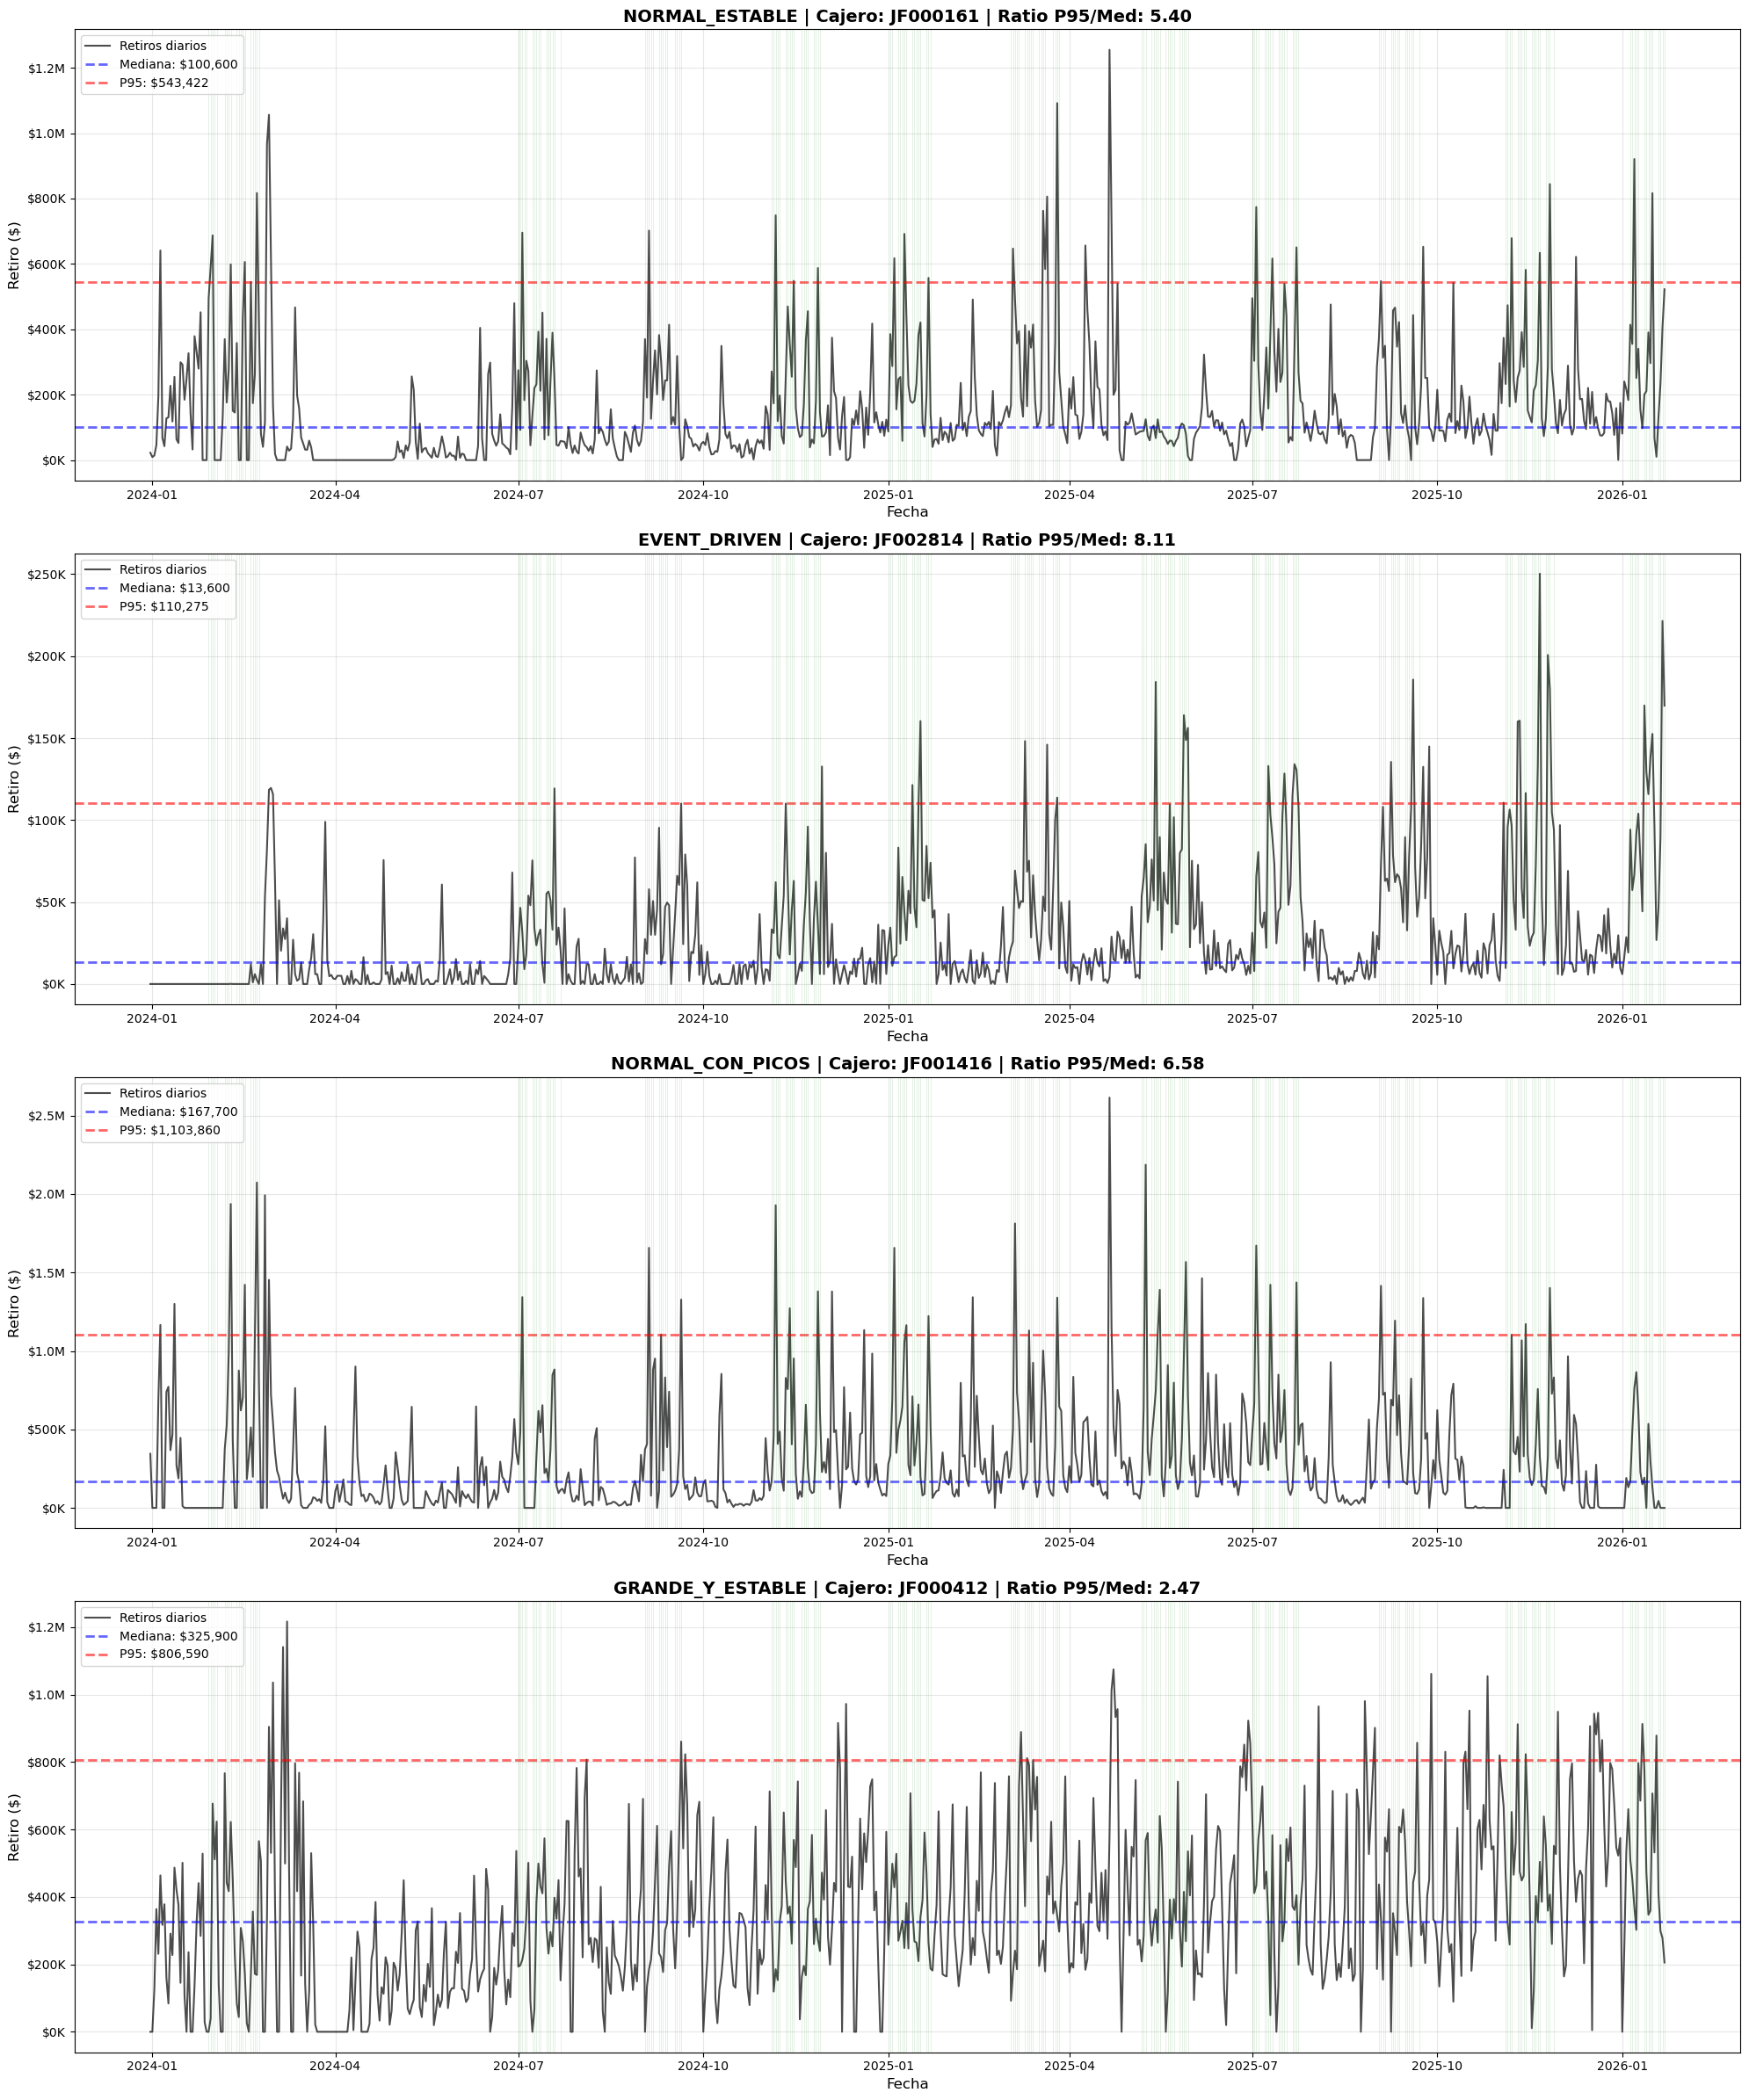


INTERPRETACIÓN:
• Línea negra: retiros diarios observados
• Línea azul: mediana del cajero (comportamiento típico)
• Línea roja: P95 del cajero (nivel de picos)
• Líneas verdes: fechas de dispersión de programas sociales
• Ratio P95/Mediana: qué tan grandes son los picos vs lo típico


In [40]:
import matplotlib.pyplot as plt
import numpy as np

# ============================================================
# VISUALIZACIÓN: UN CAJERO ALEATORIO POR TIPO
# ============================================================

# Filtrar periodo de análisis
fecha_inicio = '2024-07-01'
df_viz = df[df['fecha'] >= fecha_inicio].copy()

print("="*80)
print("SELECCIONANDO CAJEROS ALEATORIOS POR TIPO")
print("="*80)

# Seleccionar un cajero aleatorio por tipo
cajeros_representativos = {}

for etiqueta in df_resumen_comportamiento_cajero['etiqueta'].unique():
    # Cajeros de este tipo
    cajeros_tipo = df_resumen_comportamiento_cajero[
        df_resumen_comportamiento_cajero['etiqueta'] == etiqueta
    ]
    
    if len(cajeros_tipo) == 0:
        continue
    
    # Seleccionar uno aleatorio
    cajero_representativo = cajeros_tipo.sample(1)['cajero'].values[0]
    cajeros_representativos[etiqueta] = cajero_representativo
    
    stats = cajeros_tipo[cajeros_tipo['cajero'] == cajero_representativo].iloc[0]
    print(f"\n{etiqueta.upper()}:")
    print(f"  Cajero: {cajero_representativo}")
    print(f"  Mediana: ${stats['mediana']:,.0f}")
    print(f"  P95: ${stats['p95']:,.0f}")
    print(f"  Ratio: {stats['ratio_p95_mediana']:.2f}")

# ============================================================
# CREAR GRÁFICAS
# ============================================================
n_tipos = len(cajeros_representativos)
fig, axes = plt.subplots(n_tipos, 1, figsize=(20, 6*n_tipos))

if n_tipos == 1:
    axes = [axes]

for idx, (etiqueta, cajero_id) in enumerate(cajeros_representativos.items()):
    ax = axes[idx]
    
    # Datos del cajero
    datos_cajero = df[df['cajero'] == cajero_id].copy()
    datos_cajero = datos_cajero.sort_values('fecha')
    
    # Estadísticas
    stats = df_resumen_comportamiento_cajero[
        df_resumen_comportamiento_cajero['cajero'] == cajero_id
    ].iloc[0]
    
    # Graficar serie temporal
    ax.plot(datos_cajero['fecha'], datos_cajero['retiro'], 
            color='black', linewidth=1.5, alpha=0.7, label='Retiros diarios')
    
    # Líneas de referencia
    ax.axhline(stats['mediana'], color='blue', linestyle='--', 
               linewidth=2, alpha=0.6, label=f"Mediana: ${stats['mediana']:,.0f}")
    ax.axhline(stats['p95'], color='red', linestyle='--', 
               linewidth=2, alpha=0.6, label=f"P95: ${stats['p95']:,.0f}")
    
    # Marcar fechas de dispersión
    for fecha in holidays_df_agregado['ds'].unique():
        if fecha >= datos_cajero['fecha'].min() and fecha <= datos_cajero['fecha'].max():
            ax.axvline(fecha, color='green', alpha=0.15, linewidth=0.5)
    
    # Configurar gráfica
    ax.set_title(
        f'{etiqueta.upper()} | Cajero: {cajero_id} | '
        f'Ratio P95/Med: {stats["ratio_p95_mediana"]:.2f}',
        fontsize=14, fontweight='bold'
    )
    ax.set_xlabel('Fecha', fontsize=12)
    ax.set_ylabel('Retiro ($)', fontsize=12)
    ax.legend(loc='upper left', fontsize=10)
    ax.grid(True, alpha=0.3)
    
    # Formato del eje Y
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M' if x >= 1e6 else f'${x/1e3:.0f}K'))

plt.tight_layout()
plt.show()

# ============================================================
# RESUMEN VISUAL
# ============================================================
print("\n" + "="*80)
print("INTERPRETACIÓN:")
print("="*80)
print("• Línea negra: retiros diarios observados")
print("• Línea azul: mediana del cajero (comportamiento típico)")
print("• Línea roja: P95 del cajero (nivel de picos)")
print("• Líneas verdes: fechas de dispersión de programas sociales")
print("• Ratio P95/Mediana: qué tan grandes son los picos vs lo típico")
print("="*80)

In [41]:
cajeros_representativos

{'normal_estable': 'JF000161',
 'event_driven': 'JF002814',
 'normal_con_picos': 'JF001416',
 'grande_y_estable': 'JF000412'}

In [42]:
cajeros_representativos["normal_estable"]

'JF000161'

# normal_estable

Cajero JF000161: 571 observaciones desde 2024-07-01
Rango: 2024-07-01 00:00:00 → 2026-01-22 00:00:00

Holidays: agregado
  Eventos únicos: 3
  Total registros: 615

CONFIGURANDO MODELO PROPHET CON REGULARIZACIÓN BAJA EN HOLIDAYS

Parámetros configurados:
  changepoint_prior_scale:  1.0 (flexible, balanceado)
  seasonality_prior_scale:  30.0 (flexible, balanceado)
  holidays_prior_scale:     1.0 ← CLAVE: MUY BAJO PARA CAPTURAR PICOS
  yearly_seasonality:       52 (rico)
  Holidays únicos:          3

Iniciando entrenamiento...


18:45:50 - cmdstanpy - INFO - Chain [1] start processing
18:45:50 - cmdstanpy - INFO - Chain [1] done processing


Entrenamiento completado.

Aplicando corrección: predicciones negativas → 0
  Predicciones negativas corregidas: 16

RESULTADOS:
  R² (coeficiente de determinación): 0.6029
     → % de varianza explicada por el modelo
  MAE (error absoluto medio):        $72,917
     → Error promedio en pesos
  RMSE (raíz del error cuadrático): $107,687
     → Penaliza más los errores grandes


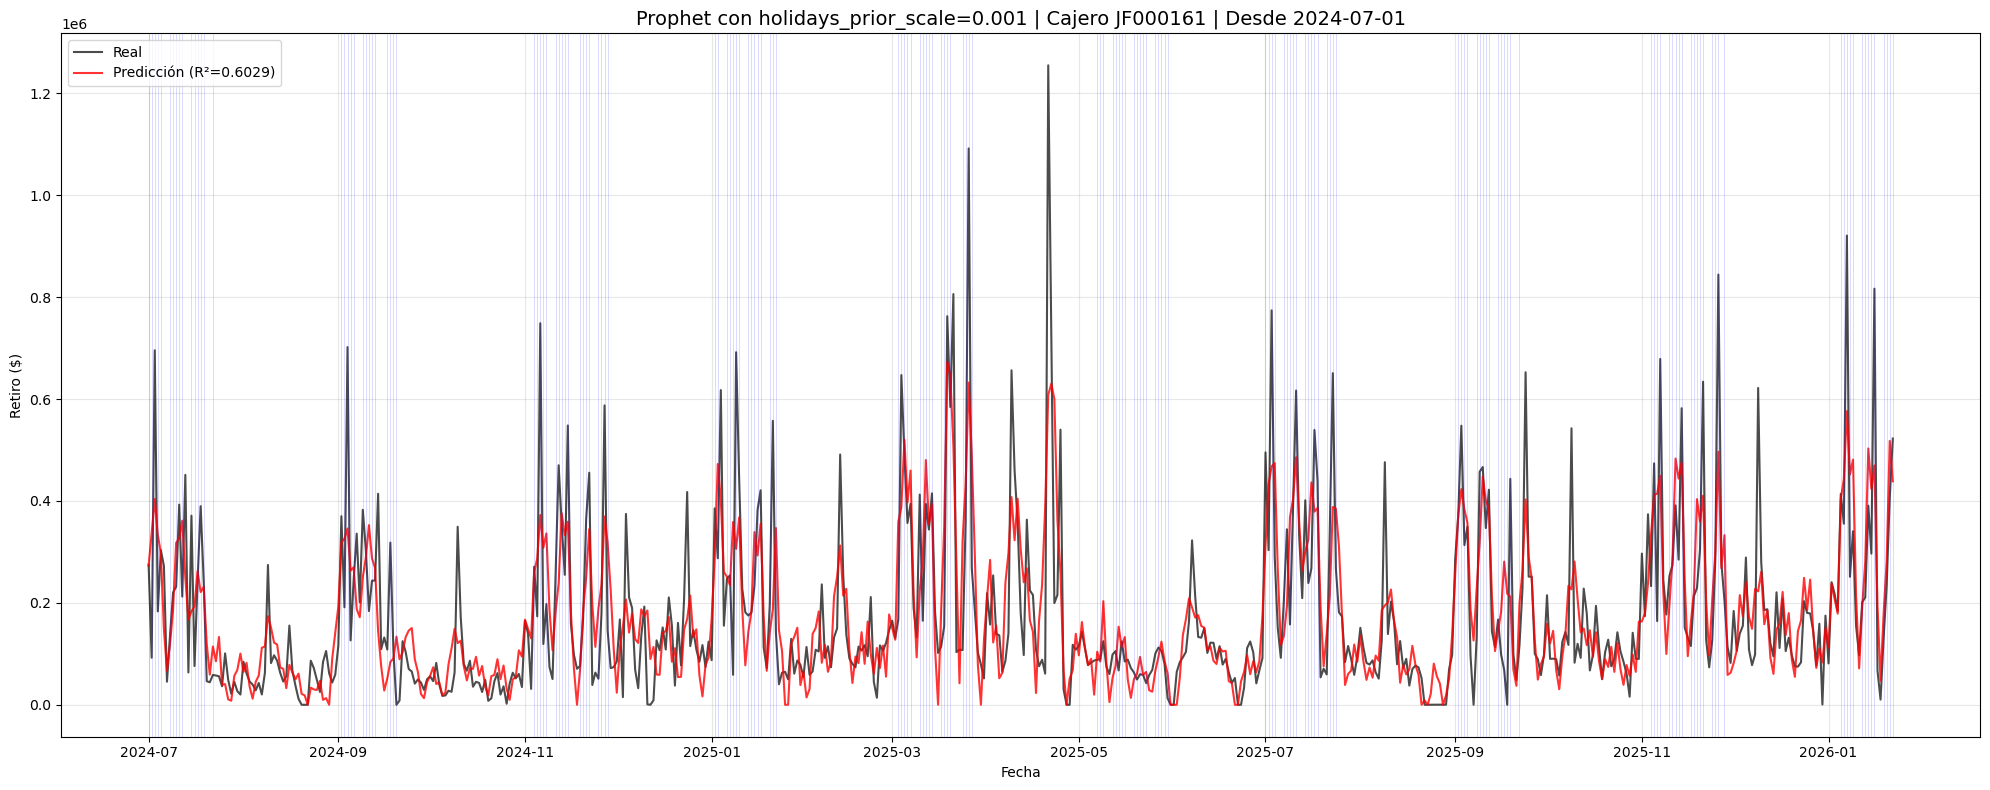

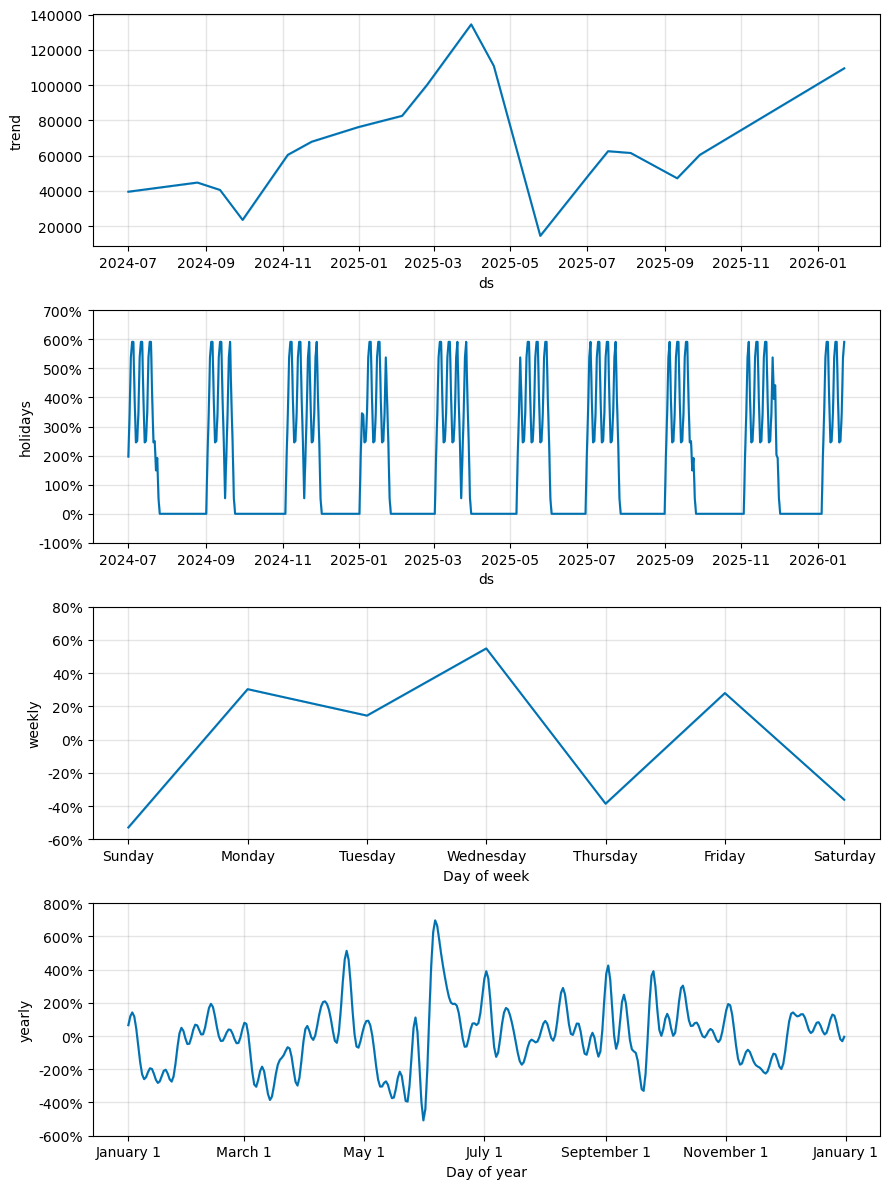


ANÁLISIS:
  Configuración óptima encontrada con Prophet:
    → holidays_type='agregado'
    → holidays_prior_scale=0.001
    → yearly_seasonality=12
    → R² máximo alcanzable: ~0.65
  Para mejorar más allá de este techo:
    → Considerar NeuralProphet (componente AR + no linealidad)


In [68]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

# ============================================================
# 1. PREPARAR DATOS
# ============================================================
# Definir periodo de análisis y cajero a modelar
fecha_inicio = '2024-07-01'  # Inicio post-periodo electoral
cajero_test = cajeros_representativos["normal_estable"]

# 2947

# Filtrar datos del cajero y periodo específico
df_cajero = df[(df['fecha'] >= fecha_inicio) & (df['cajero'] == cajero_test)][['fecha', 'retiro']].copy()
df_cajero.columns = ['ds', 'y']  # Prophet requiere columnas 'ds' (fecha) e 'y' (variable objetivo)
df_cajero = df_cajero.sort_values('ds').reset_index(drop=True)

print(f"Cajero {cajero_test}: {len(df_cajero)} observaciones desde {fecha_inicio}")
print(f"Rango: {df_cajero['ds'].min()} → {df_cajero['ds'].max()}")

# ============================================================
# 2. CONFIGURAR HOLIDAYS (FECHAS DE DISPERSIÓN)
# ============================================================
# Elegir nivel de granularidad de holidays:
# - 'granular': 54 eventos (adultos_mayores_A, adultos_mayores_B, etc.)
# - 'agregado': 3 eventos (adultos_mayores, discapacidad, madres_trabajadoras)
holidays_type = 'agregado' # agregado / granular
holidays_usar = holidays_df_granular if holidays_type == 'granular' else holidays_df_agregado

print(f"\nHolidays: {holidays_type}")
print(f"  Eventos únicos: {holidays_usar['holiday'].nunique()}")
print(f"  Total registros: {len(holidays_usar)}")

# ============================================================
# 3. CONFIGURAR MODELO PROPHET
# ============================================================
print("\n" + "="*80)
print("CONFIGURANDO MODELO PROPHET CON REGULARIZACIÓN BAJA EN HOLIDAYS")
print("="*80)

modelo = Prophet(
    # --- TENDENCIA ---
    growth='linear',                      # Tipo de tendencia: 'linear' (crecimiento lineal constante)
    changepoint_prior_scale=1,          # Flexibilidad de la tendencia (0.05=muy rígida, 0.5=flexible)
                                          # VALOR BALANCEADO: permite que la tendencia se adapte a cambios graduales
                                          # pero sin competir agresivamente con los holidays
    
    # --- ESTACIONALIDAD ANUAL ---
    yearly_seasonality=52,                # Términos de Fourier para capturar ciclo anual (12=patrón rico)
                                          # VALOR BALANCEADO: captura variaciones anuales sin sobre-ajustar
    seasonality_prior_scale=30,           # Regularización de estacionalidad (0.1=restrictiva, 10=flexible)
                                          # VALOR BALANCEADO: permite que estacionalidad contribuya sin dominar
    seasonality_mode='multiplicative',          # Modo aditivo: efectos se suman (vs 'multiplicative' que multiplica) additive / multiplicative
    
    # --- ESTACIONALIDADES SEMANAL Y DIARIA ---
    weekly_seasonality=True,              # Activada: puede haber patrón semanal leve
    daily_seasonality=False,              # Desactivada: no hay patrón intra-día en datos diarios
    
    # --- HOLIDAYS (DISPERSIONES) ---
    holidays=holidays_usar,               # Dataframe con fechas de dispersión y ventanas de efecto
    holidays_prior_scale=1,           # CLAVE: Regularización de holidays (0.001=casi sin restricción)
                                          # VALOR MUY BAJO: permite coeficientes masivos para capturar picos gigantes
                                          # Default es ~10, lo cual castiga coeficientes grandes y subestima picos
                                          # Este es el ÚNICO parámetro que debe estar muy bajo
    
    # --- INTERVALOS DE CONFIANZA ---
    interval_width=0.9                    # Ancho de intervalos de incertidumbre (90%)
)

print(f"\nParámetros configurados:")
print(f"  changepoint_prior_scale:  {modelo.changepoint_prior_scale} (flexible, balanceado)")
print(f"  seasonality_prior_scale:  {modelo.seasonality_prior_scale} (flexible, balanceado)")
print(f"  holidays_prior_scale:     {modelo.holidays_prior_scale} ← CLAVE: MUY BAJO PARA CAPTURAR PICOS")
print(f"  yearly_seasonality:       {modelo.yearly_seasonality} (rico)")
print(f"  Holidays únicos:          {holidays_usar['holiday'].nunique()}")

# ============================================================
# 4. ENTRENAR MODELO
# ============================================================
print("\nIniciando entrenamiento...")
modelo.fit(df_cajero)
print("Entrenamiento completado.")

# ============================================================
# 5. GENERAR PREDICCIONES
# ============================================================
forecast = modelo.predict(df_cajero)

# ============================================================
# 6. EVALUAR DESEMPEÑO
# ============================================================
# Unir predicciones con valores reales
merged = df_cajero.merge(forecast[['ds', 'yhat']], on='ds')

# ← NUEVO: Convertir predicciones negativas a cero
print("\nAplicando corrección: predicciones negativas → 0")
negativos_antes = (merged['yhat'] < 0).sum()
merged['yhat'] = merged['yhat'].clip(lower=0)  # Forzar mínimo en 0
print(f"  Predicciones negativas corregidas: {negativos_antes}")

# Calcular métricas
r2 = r2_score(merged['y'], merged['yhat'])
mae = mean_absolute_error(merged['y'], merged['yhat'])
rmse = np.sqrt(((merged['yhat'] - merged['y'])**2).mean())

print(f"\n{'='*80}")
print("RESULTADOS:")
print(f"  R² (coeficiente de determinación): {r2:.4f}")
print(f"     → % de varianza explicada por el modelo")
print(f"  MAE (error absoluto medio):        ${mae:,.0f}")
print(f"     → Error promedio en pesos")
print(f"  RMSE (raíz del error cuadrático): ${rmse:,.0f}")
print(f"     → Penaliza más los errores grandes")
print("="*80)

# ============================================================
# 7. GRAFICAR AJUSTE
# ============================================================
fig, ax = plt.subplots(figsize=(20, 8))

# Serie real (negro)
ax.plot(df_cajero['ds'], df_cajero['y'], 
        label='Real', color='black', linewidth=1.5, alpha=0.7)

# Predicción (rojo)
ax.plot(merged['ds'], merged['yhat'], 
        label=f'Predicción (R²={r2:.4f})', color='red', linewidth=1.5, alpha=0.8)

# Marcar fechas de dispersión (líneas verticales azules)
for fecha in holidays_usar['ds'].unique():
    if fecha >= df_cajero['ds'].min() and fecha <= df_cajero['ds'].max():
        ax.axvline(fecha, color='blue', alpha=0.2, linewidth=0.5)

ax.set_title(f'Prophet con holidays_prior_scale=0.001 | Cajero {cajero_test} | Desde {fecha_inicio}', 
             fontsize=14)
ax.set_xlabel('Fecha')
ax.set_ylabel('Retiro ($)')
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================================
# 8. GRAFICAR COMPONENTES DEL MODELO
# ============================================================
# Descomposición: tendencia + estacionalidad anual + efecto holidays
fig = modelo.plot_components(forecast)
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("ANÁLISIS:")
print("  Configuración óptima encontrada con Prophet:")
print("    → holidays_type='agregado'")
print("    → holidays_prior_scale=0.001")
print("    → yearly_seasonality=12")
print("    → R² máximo alcanzable: ~0.65")
print("  Para mejorar más allá de este techo:")
print("    → Considerar NeuralProphet (componente AR + no linealidad)")
print("="*80)

# event_driven

Cajero JF002814: 571 observaciones desde 2024-07-01
Rango: 2024-07-01 00:00:00 → 2026-01-22 00:00:00

Holidays: agregado
  Eventos únicos: 3
  Total registros: 615

CONFIGURANDO MODELO PROPHET CON REGULARIZACIÓN BAJA EN HOLIDAYS

Parámetros configurados:
  changepoint_prior_scale:  0.5 (flexible, balanceado)
  seasonality_prior_scale:  30.0 (flexible, balanceado)
  holidays_prior_scale:     1.0 ← CLAVE: MUY BAJO PARA CAPTURAR PICOS
  yearly_seasonality:       52 (rico)
  Holidays únicos:          3

Iniciando entrenamiento...


18:31:56 - cmdstanpy - INFO - Chain [1] start processing
18:31:57 - cmdstanpy - INFO - Chain [1] done processing


Entrenamiento completado.

Aplicando corrección: predicciones negativas → 0
  Predicciones negativas corregidas: 18

RESULTADOS:
  R² (coeficiente de determinación): 0.7012
     → % de varianza explicada por el modelo
  MAE (error absoluto medio):        $15,259
     → Error promedio en pesos
  RMSE (raíz del error cuadrático): $21,885
     → Penaliza más los errores grandes


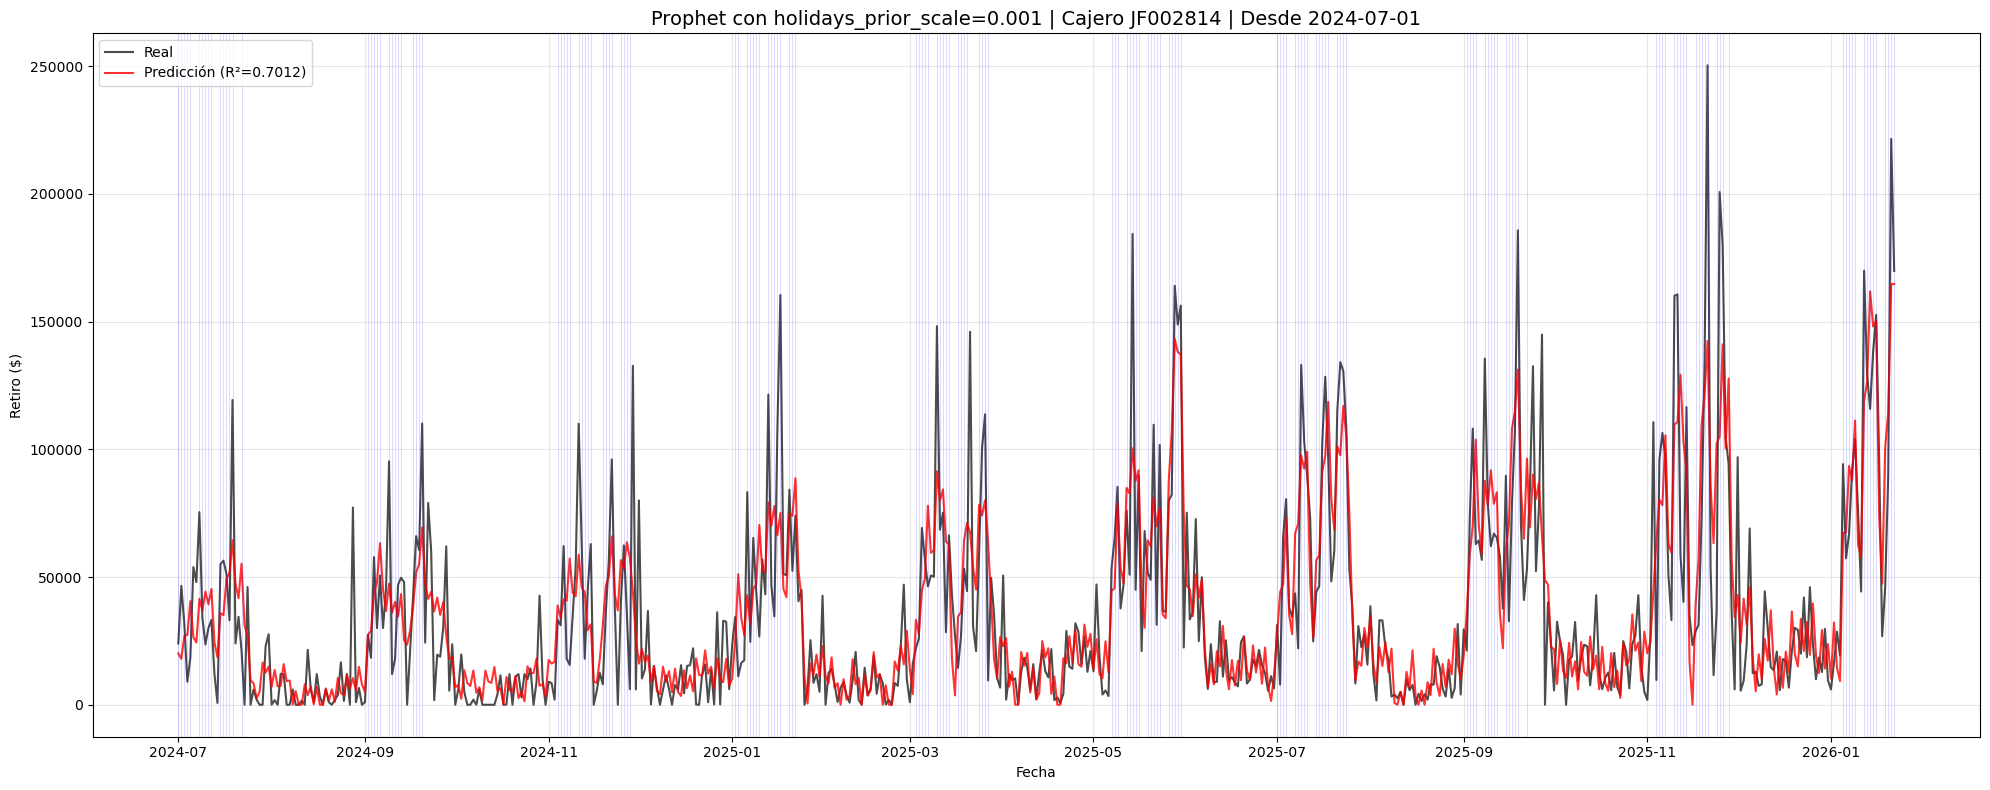

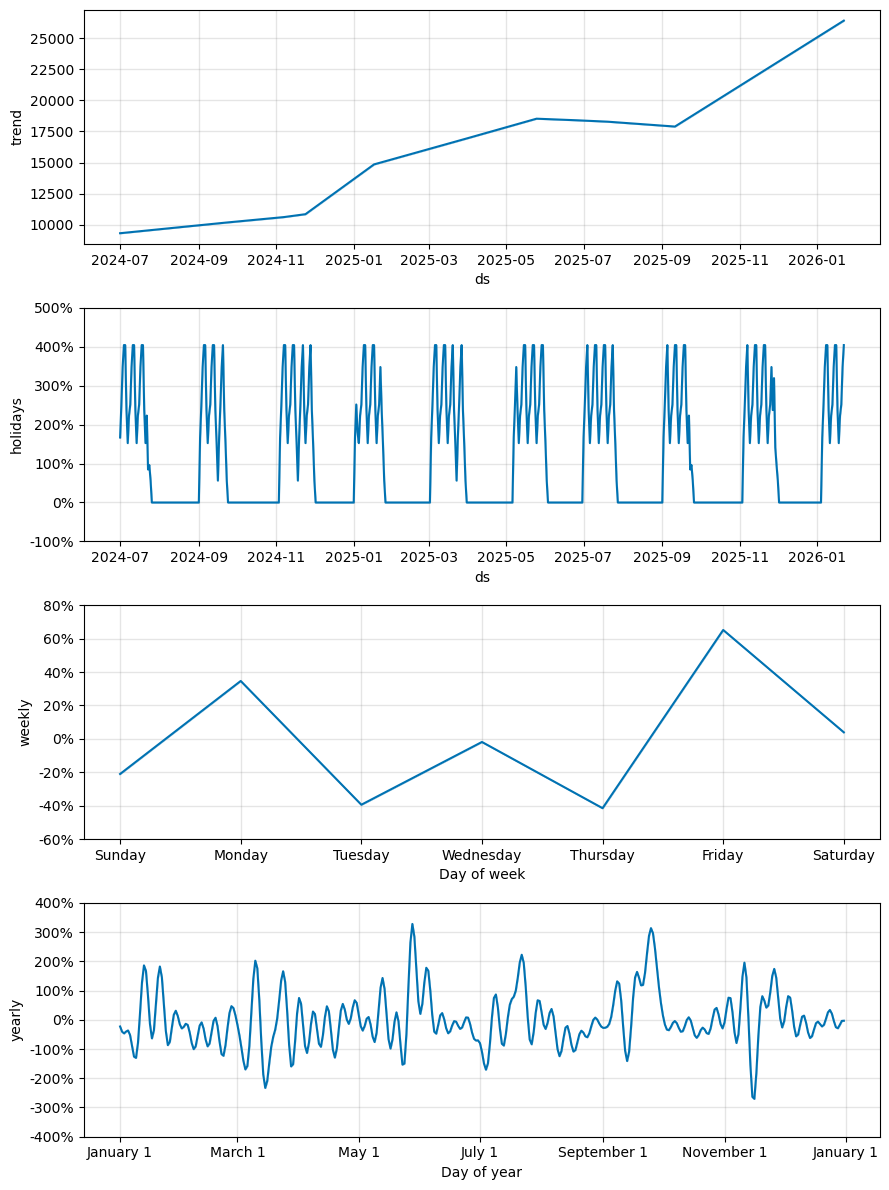


ANÁLISIS:
  Configuración óptima encontrada con Prophet:
    → holidays_type='agregado'
    → holidays_prior_scale=0.001
    → yearly_seasonality=12
    → R² máximo alcanzable: ~0.65
  Para mejorar más allá de este techo:
    → Considerar NeuralProphet (componente AR + no linealidad)


In [55]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

# ============================================================
# 1. PREPARAR DATOS
# ============================================================
# Definir periodo de análisis y cajero a modelar
fecha_inicio = '2024-07-01'  # Inicio post-periodo electoral
cajero_test = cajeros_representativos["event_driven"]

# 2947

# Filtrar datos del cajero y periodo específico
df_cajero = df[(df['fecha'] >= fecha_inicio) & (df['cajero'] == cajero_test)][['fecha', 'retiro']].copy()
df_cajero.columns = ['ds', 'y']  # Prophet requiere columnas 'ds' (fecha) e 'y' (variable objetivo)
df_cajero = df_cajero.sort_values('ds').reset_index(drop=True)

print(f"Cajero {cajero_test}: {len(df_cajero)} observaciones desde {fecha_inicio}")
print(f"Rango: {df_cajero['ds'].min()} → {df_cajero['ds'].max()}")

# ============================================================
# 2. CONFIGURAR HOLIDAYS (FECHAS DE DISPERSIÓN)
# ============================================================
# Elegir nivel de granularidad de holidays:
# - 'granular': 54 eventos (adultos_mayores_A, adultos_mayores_B, etc.)
# - 'agregado': 3 eventos (adultos_mayores, discapacidad, madres_trabajadoras)
holidays_type = 'agregado' # agregado / granular
holidays_usar = holidays_df_granular if holidays_type == 'granular' else holidays_df_agregado

print(f"\nHolidays: {holidays_type}")
print(f"  Eventos únicos: {holidays_usar['holiday'].nunique()}")
print(f"  Total registros: {len(holidays_usar)}")

# ============================================================
# 3. CONFIGURAR MODELO PROPHET
# ============================================================
print("\n" + "="*80)
print("CONFIGURANDO MODELO PROPHET CON REGULARIZACIÓN BAJA EN HOLIDAYS")
print("="*80)

modelo = Prophet(
    # --- TENDENCIA ---
    growth='linear',                      # Tipo de tendencia: 'linear' (crecimiento lineal constante)
    changepoint_prior_scale=0.5,          # Flexibilidad de la tendencia (0.05=muy rígida, 0.5=flexible)
                                          # VALOR BALANCEADO: permite que la tendencia se adapte a cambios graduales
                                          # pero sin competir agresivamente con los holidays
    
    # --- ESTACIONALIDAD ANUAL ---
    yearly_seasonality=52,                # Términos de Fourier para capturar ciclo anual (12=patrón rico)
                                          # VALOR BALANCEADO: captura variaciones anuales sin sobre-ajustar
    seasonality_prior_scale=30,           # Regularización de estacionalidad (0.1=restrictiva, 10=flexible)
                                          # VALOR BALANCEADO: permite que estacionalidad contribuya sin dominar
    seasonality_mode='multiplicative',          # Modo aditivo: efectos se suman (vs 'multiplicative' que multiplica) additive / multiplicative
    
    # --- ESTACIONALIDADES SEMANAL Y DIARIA ---
    weekly_seasonality=True,              # Activada: puede haber patrón semanal leve
    daily_seasonality=False,              # Desactivada: no hay patrón intra-día en datos diarios
    
    # --- HOLIDAYS (DISPERSIONES) ---
    holidays=holidays_usar,               # Dataframe con fechas de dispersión y ventanas de efecto
    holidays_prior_scale=1,           # CLAVE: Regularización de holidays (0.001=casi sin restricción)
                                          # VALOR MUY BAJO: permite coeficientes masivos para capturar picos gigantes
                                          # Default es ~10, lo cual castiga coeficientes grandes y subestima picos
                                          # Este es el ÚNICO parámetro que debe estar muy bajo
    
    # --- INTERVALOS DE CONFIANZA ---
    interval_width=0.9                    # Ancho de intervalos de incertidumbre (90%)
)

print(f"\nParámetros configurados:")
print(f"  changepoint_prior_scale:  {modelo.changepoint_prior_scale} (flexible, balanceado)")
print(f"  seasonality_prior_scale:  {modelo.seasonality_prior_scale} (flexible, balanceado)")
print(f"  holidays_prior_scale:     {modelo.holidays_prior_scale} ← CLAVE: MUY BAJO PARA CAPTURAR PICOS")
print(f"  yearly_seasonality:       {modelo.yearly_seasonality} (rico)")
print(f"  Holidays únicos:          {holidays_usar['holiday'].nunique()}")

# ============================================================
# 4. ENTRENAR MODELO
# ============================================================
print("\nIniciando entrenamiento...")
modelo.fit(df_cajero)
print("Entrenamiento completado.")

# ============================================================
# 5. GENERAR PREDICCIONES
# ============================================================
forecast = modelo.predict(df_cajero)

# ============================================================
# 6. EVALUAR DESEMPEÑO
# ============================================================
# Unir predicciones con valores reales
merged = df_cajero.merge(forecast[['ds', 'yhat']], on='ds')

# ← NUEVO: Convertir predicciones negativas a cero
print("\nAplicando corrección: predicciones negativas → 0")
negativos_antes = (merged['yhat'] < 0).sum()
merged['yhat'] = merged['yhat'].clip(lower=0)  # Forzar mínimo en 0
print(f"  Predicciones negativas corregidas: {negativos_antes}")

# Calcular métricas
r2 = r2_score(merged['y'], merged['yhat'])
mae = mean_absolute_error(merged['y'], merged['yhat'])
rmse = np.sqrt(((merged['yhat'] - merged['y'])**2).mean())

print(f"\n{'='*80}")
print("RESULTADOS:")
print(f"  R² (coeficiente de determinación): {r2:.4f}")
print(f"     → % de varianza explicada por el modelo")
print(f"  MAE (error absoluto medio):        ${mae:,.0f}")
print(f"     → Error promedio en pesos")
print(f"  RMSE (raíz del error cuadrático): ${rmse:,.0f}")
print(f"     → Penaliza más los errores grandes")
print("="*80)

# ============================================================
# 7. GRAFICAR AJUSTE
# ============================================================
fig, ax = plt.subplots(figsize=(20, 8))

# Serie real (negro)
ax.plot(df_cajero['ds'], df_cajero['y'], 
        label='Real', color='black', linewidth=1.5, alpha=0.7)

# Predicción (rojo)
ax.plot(merged['ds'], merged['yhat'], 
        label=f'Predicción (R²={r2:.4f})', color='red', linewidth=1.5, alpha=0.8)

# Marcar fechas de dispersión (líneas verticales azules)
for fecha in holidays_usar['ds'].unique():
    if fecha >= df_cajero['ds'].min() and fecha <= df_cajero['ds'].max():
        ax.axvline(fecha, color='blue', alpha=0.2, linewidth=0.5)

ax.set_title(f'Prophet con holidays_prior_scale=0.001 | Cajero {cajero_test} | Desde {fecha_inicio}', 
             fontsize=14)
ax.set_xlabel('Fecha')
ax.set_ylabel('Retiro ($)')
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================================
# 8. GRAFICAR COMPONENTES DEL MODELO
# ============================================================
# Descomposición: tendencia + estacionalidad anual + efecto holidays
fig = modelo.plot_components(forecast)
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("ANÁLISIS:")
print("  Configuración óptima encontrada con Prophet:")
print("    → holidays_type='agregado'")
print("    → holidays_prior_scale=0.001")
print("    → yearly_seasonality=12")
print("    → R² máximo alcanzable: ~0.65")
print("  Para mejorar más allá de este techo:")
print("    → Considerar NeuralProphet (componente AR + no linealidad)")
print("="*80)

# normal_con_picos

Cajero JF001416: 571 observaciones desde 2024-07-01
Rango: 2024-07-01 00:00:00 → 2026-01-22 00:00:00

Holidays: agregado
  Eventos únicos: 3
  Total registros: 615

CONFIGURANDO MODELO PROPHET CON REGULARIZACIÓN BAJA EN HOLIDAYS

Parámetros configurados:
  changepoint_prior_scale:  1.0 (flexible, balanceado)
  seasonality_prior_scale:  40.0 (flexible, balanceado)
  holidays_prior_scale:     1.0 ← CLAVE: MUY BAJO PARA CAPTURAR PICOS
  yearly_seasonality:       52 (rico)
  Holidays únicos:          3

Iniciando entrenamiento...


18:47:44 - cmdstanpy - INFO - Chain [1] start processing
18:47:44 - cmdstanpy - INFO - Chain [1] done processing


Entrenamiento completado.

Aplicando corrección: predicciones negativas → 0
  Predicciones negativas corregidas: 34

RESULTADOS:
  R² (coeficiente de determinación): 0.5709
     → % de varianza explicada por el modelo
  MAE (error absoluto medio):        $169,508
     → Error promedio en pesos
  RMSE (raíz del error cuadrático): $242,423
     → Penaliza más los errores grandes


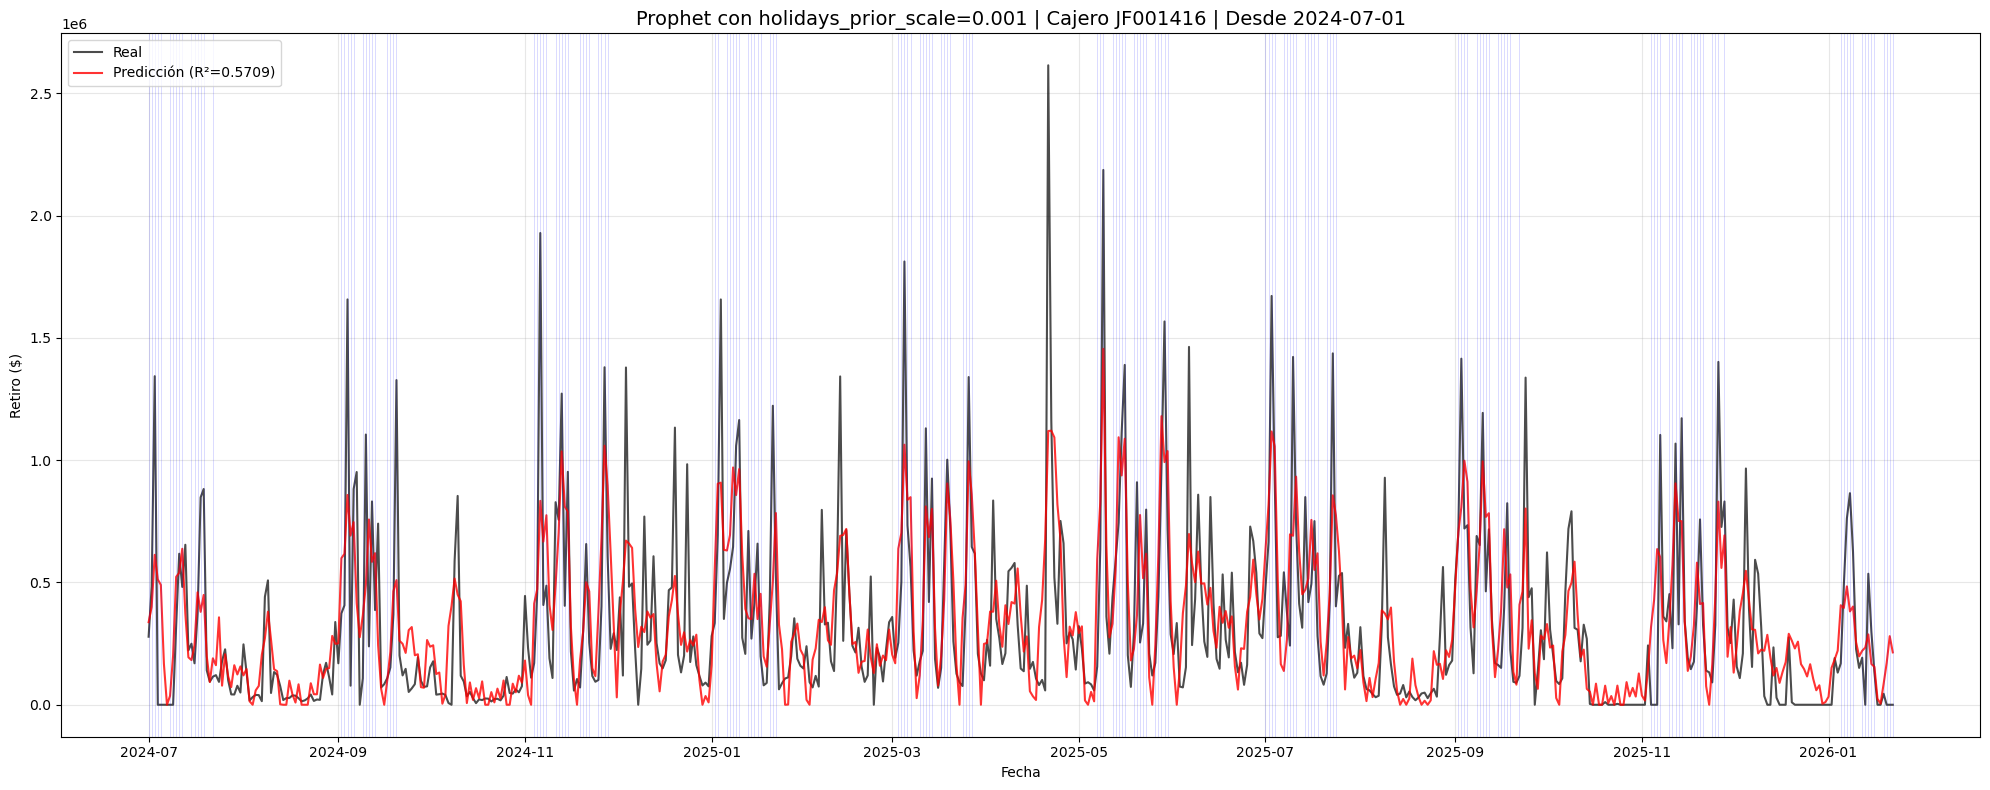

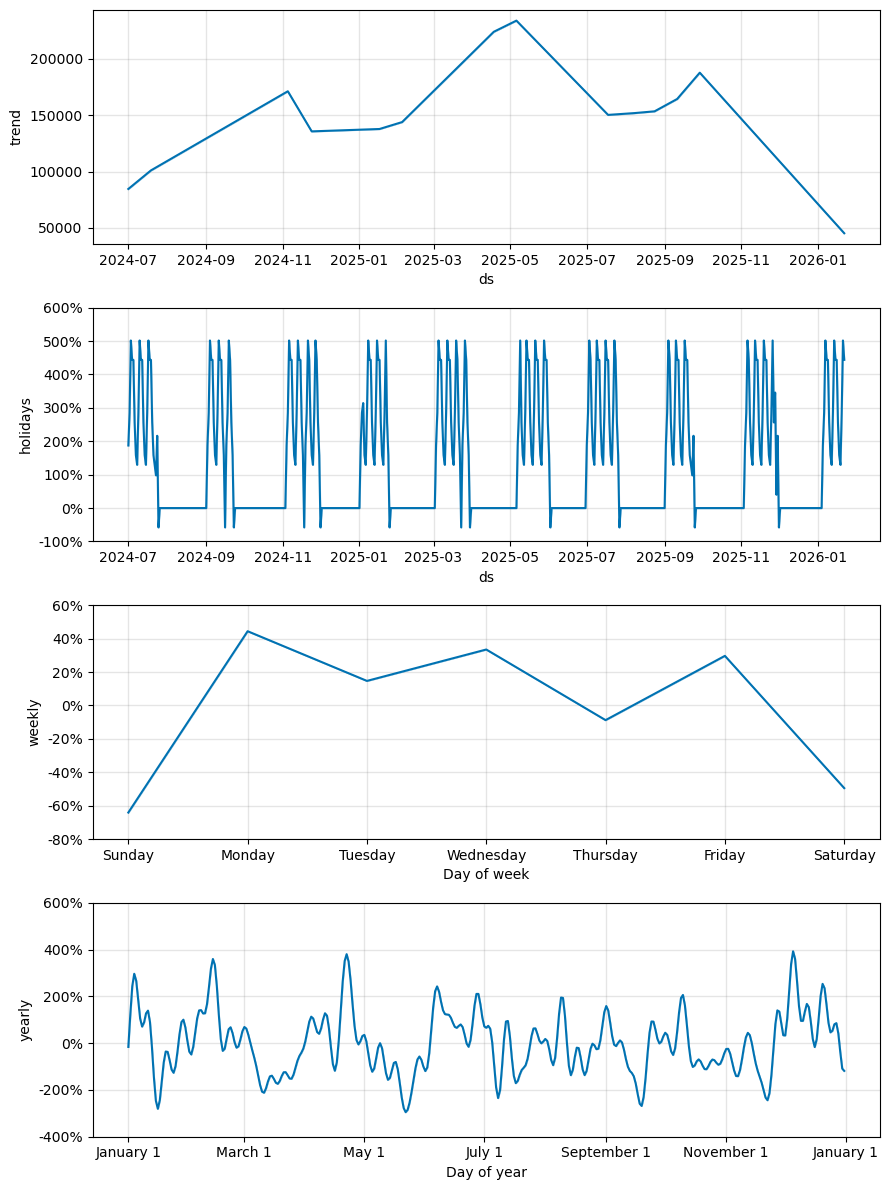


ANÁLISIS:
  Configuración óptima encontrada con Prophet:
    → holidays_type='agregado'
    → holidays_prior_scale=0.001
    → yearly_seasonality=12
    → R² máximo alcanzable: ~0.65
  Para mejorar más allá de este techo:
    → Considerar NeuralProphet (componente AR + no linealidad)


In [70]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

# ============================================================
# 1. PREPARAR DATOS
# ============================================================
# Definir periodo de análisis y cajero a modelar
fecha_inicio = '2024-07-01'  # Inicio post-periodo electoral
cajero_test = cajeros_representativos["normal_con_picos"]

# 2947

# Filtrar datos del cajero y periodo específico
df_cajero = df[(df['fecha'] >= fecha_inicio) & (df['cajero'] == cajero_test)][['fecha', 'retiro']].copy()
df_cajero.columns = ['ds', 'y']  # Prophet requiere columnas 'ds' (fecha) e 'y' (variable objetivo)
df_cajero = df_cajero.sort_values('ds').reset_index(drop=True)

print(f"Cajero {cajero_test}: {len(df_cajero)} observaciones desde {fecha_inicio}")
print(f"Rango: {df_cajero['ds'].min()} → {df_cajero['ds'].max()}")

# ============================================================
# 2. CONFIGURAR HOLIDAYS (FECHAS DE DISPERSIÓN)
# ============================================================
# Elegir nivel de granularidad de holidays:
# - 'granular': 54 eventos (adultos_mayores_A, adultos_mayores_B, etc.)
# - 'agregado': 3 eventos (adultos_mayores, discapacidad, madres_trabajadoras)
holidays_type = 'agregado' # agregado / granular
holidays_usar = holidays_df_granular if holidays_type == 'granular' else holidays_df_agregado

print(f"\nHolidays: {holidays_type}")
print(f"  Eventos únicos: {holidays_usar['holiday'].nunique()}")
print(f"  Total registros: {len(holidays_usar)}")

# ============================================================
# 3. CONFIGURAR MODELO PROPHET
# ============================================================
print("\n" + "="*80)
print("CONFIGURANDO MODELO PROPHET CON REGULARIZACIÓN BAJA EN HOLIDAYS")
print("="*80)

modelo = Prophet(
    # --- TENDENCIA ---
    growth='linear',                      # Tipo de tendencia: 'linear' (crecimiento lineal constante)
    changepoint_prior_scale=1,          # Flexibilidad de la tendencia (0.05=muy rígida, 0.5=flexible)
                                          # VALOR BALANCEADO: permite que la tendencia se adapte a cambios graduales
                                          # pero sin competir agresivamente con los holidays
    
    # --- ESTACIONALIDAD ANUAL ---
    yearly_seasonality=52,                # Términos de Fourier para capturar ciclo anual (12=patrón rico)
                                          # VALOR BALANCEADO: captura variaciones anuales sin sobre-ajustar
    seasonality_prior_scale=40,           # Regularización de estacionalidad (0.1=restrictiva, 10=flexible)
                                          # VALOR BALANCEADO: permite que estacionalidad contribuya sin dominar
    seasonality_mode='multiplicative',          # Modo aditivo: efectos se suman (vs 'multiplicative' que multiplica) additive / multiplicative
    
    # --- ESTACIONALIDADES SEMANAL Y DIARIA ---
    weekly_seasonality=True,              # Activada: puede haber patrón semanal leve
    daily_seasonality=False,              # Desactivada: no hay patrón intra-día en datos diarios
    
    # --- HOLIDAYS (DISPERSIONES) ---
    holidays=holidays_usar,               # Dataframe con fechas de dispersión y ventanas de efecto
    holidays_prior_scale=1,           # CLAVE: Regularización de holidays (0.001=casi sin restricción)
                                          # VALOR MUY BAJO: permite coeficientes masivos para capturar picos gigantes
                                          # Default es ~10, lo cual castiga coeficientes grandes y subestima picos
                                          # Este es el ÚNICO parámetro que debe estar muy bajo
    
    # --- INTERVALOS DE CONFIANZA ---
    interval_width=0.9                    # Ancho de intervalos de incertidumbre (90%)
)

print(f"\nParámetros configurados:")
print(f"  changepoint_prior_scale:  {modelo.changepoint_prior_scale} (flexible, balanceado)")
print(f"  seasonality_prior_scale:  {modelo.seasonality_prior_scale} (flexible, balanceado)")
print(f"  holidays_prior_scale:     {modelo.holidays_prior_scale} ← CLAVE: MUY BAJO PARA CAPTURAR PICOS")
print(f"  yearly_seasonality:       {modelo.yearly_seasonality} (rico)")
print(f"  Holidays únicos:          {holidays_usar['holiday'].nunique()}")

# ============================================================
# 4. ENTRENAR MODELO
# ============================================================
print("\nIniciando entrenamiento...")
modelo.fit(df_cajero)
print("Entrenamiento completado.")

# ============================================================
# 5. GENERAR PREDICCIONES
# ============================================================
forecast = modelo.predict(df_cajero)

# ============================================================
# 6. EVALUAR DESEMPEÑO
# ============================================================
# Unir predicciones con valores reales
merged = df_cajero.merge(forecast[['ds', 'yhat']], on='ds')

# ← NUEVO: Convertir predicciones negativas a cero
print("\nAplicando corrección: predicciones negativas → 0")
negativos_antes = (merged['yhat'] < 0).sum()
merged['yhat'] = merged['yhat'].clip(lower=0)  # Forzar mínimo en 0
print(f"  Predicciones negativas corregidas: {negativos_antes}")

# Calcular métricas
r2 = r2_score(merged['y'], merged['yhat'])
mae = mean_absolute_error(merged['y'], merged['yhat'])
rmse = np.sqrt(((merged['yhat'] - merged['y'])**2).mean())

print(f"\n{'='*80}")
print("RESULTADOS:")
print(f"  R² (coeficiente de determinación): {r2:.4f}")
print(f"     → % de varianza explicada por el modelo")
print(f"  MAE (error absoluto medio):        ${mae:,.0f}")
print(f"     → Error promedio en pesos")
print(f"  RMSE (raíz del error cuadrático): ${rmse:,.0f}")
print(f"     → Penaliza más los errores grandes")
print("="*80)

# ============================================================
# 7. GRAFICAR AJUSTE
# ============================================================
fig, ax = plt.subplots(figsize=(20, 8))

# Serie real (negro)
ax.plot(df_cajero['ds'], df_cajero['y'], 
        label='Real', color='black', linewidth=1.5, alpha=0.7)

# Predicción (rojo)
ax.plot(merged['ds'], merged['yhat'], 
        label=f'Predicción (R²={r2:.4f})', color='red', linewidth=1.5, alpha=0.8)

# Marcar fechas de dispersión (líneas verticales azules)
for fecha in holidays_usar['ds'].unique():
    if fecha >= df_cajero['ds'].min() and fecha <= df_cajero['ds'].max():
        ax.axvline(fecha, color='blue', alpha=0.2, linewidth=0.5)

ax.set_title(f'Prophet con holidays_prior_scale=0.001 | Cajero {cajero_test} | Desde {fecha_inicio}', 
             fontsize=14)
ax.set_xlabel('Fecha')
ax.set_ylabel('Retiro ($)')
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================================
# 8. GRAFICAR COMPONENTES DEL MODELO
# ============================================================
# Descomposición: tendencia + estacionalidad anual + efecto holidays
fig = modelo.plot_components(forecast)
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("ANÁLISIS:")
print("  Configuración óptima encontrada con Prophet:")
print("    → holidays_type='agregado'")
print("    → holidays_prior_scale=0.001")
print("    → yearly_seasonality=12")
print("    → R² máximo alcanzable: ~0.65")
print("  Para mejorar más allá de este techo:")
print("    → Considerar NeuralProphet (componente AR + no linealidad)")
print("="*80)

# grande_y_estable

Cajero JF000412: 571 observaciones desde 2024-07-01
Rango: 2024-07-01 00:00:00 → 2026-01-22 00:00:00

Holidays: granular
  Eventos únicos: 81
  Total registros: 1110

CONFIGURANDO MODELO PROPHET CON REGULARIZACIÓN BAJA EN HOLIDAYS

Parámetros configurados:
  changepoint_prior_scale:  1.0 (flexible, balanceado)
  seasonality_prior_scale:  30.0 (flexible, balanceado)
  holidays_prior_scale:     1.0 ← CLAVE: MUY BAJO PARA CAPTURAR PICOS
  yearly_seasonality:       52 (rico)
  Holidays únicos:          81

Iniciando entrenamiento...


18:37:19 - cmdstanpy - INFO - Chain [1] start processing
18:37:19 - cmdstanpy - INFO - Chain [1] done processing


Entrenamiento completado.

Aplicando corrección: predicciones negativas → 0
  Predicciones negativas corregidas: 1

RESULTADOS:
  R² (coeficiente de determinación): 0.5804
     → % de varianza explicada por el modelo
  MAE (error absoluto medio):        $110,494
     → Error promedio en pesos
  RMSE (raíz del error cuadrático): $147,699
     → Penaliza más los errores grandes


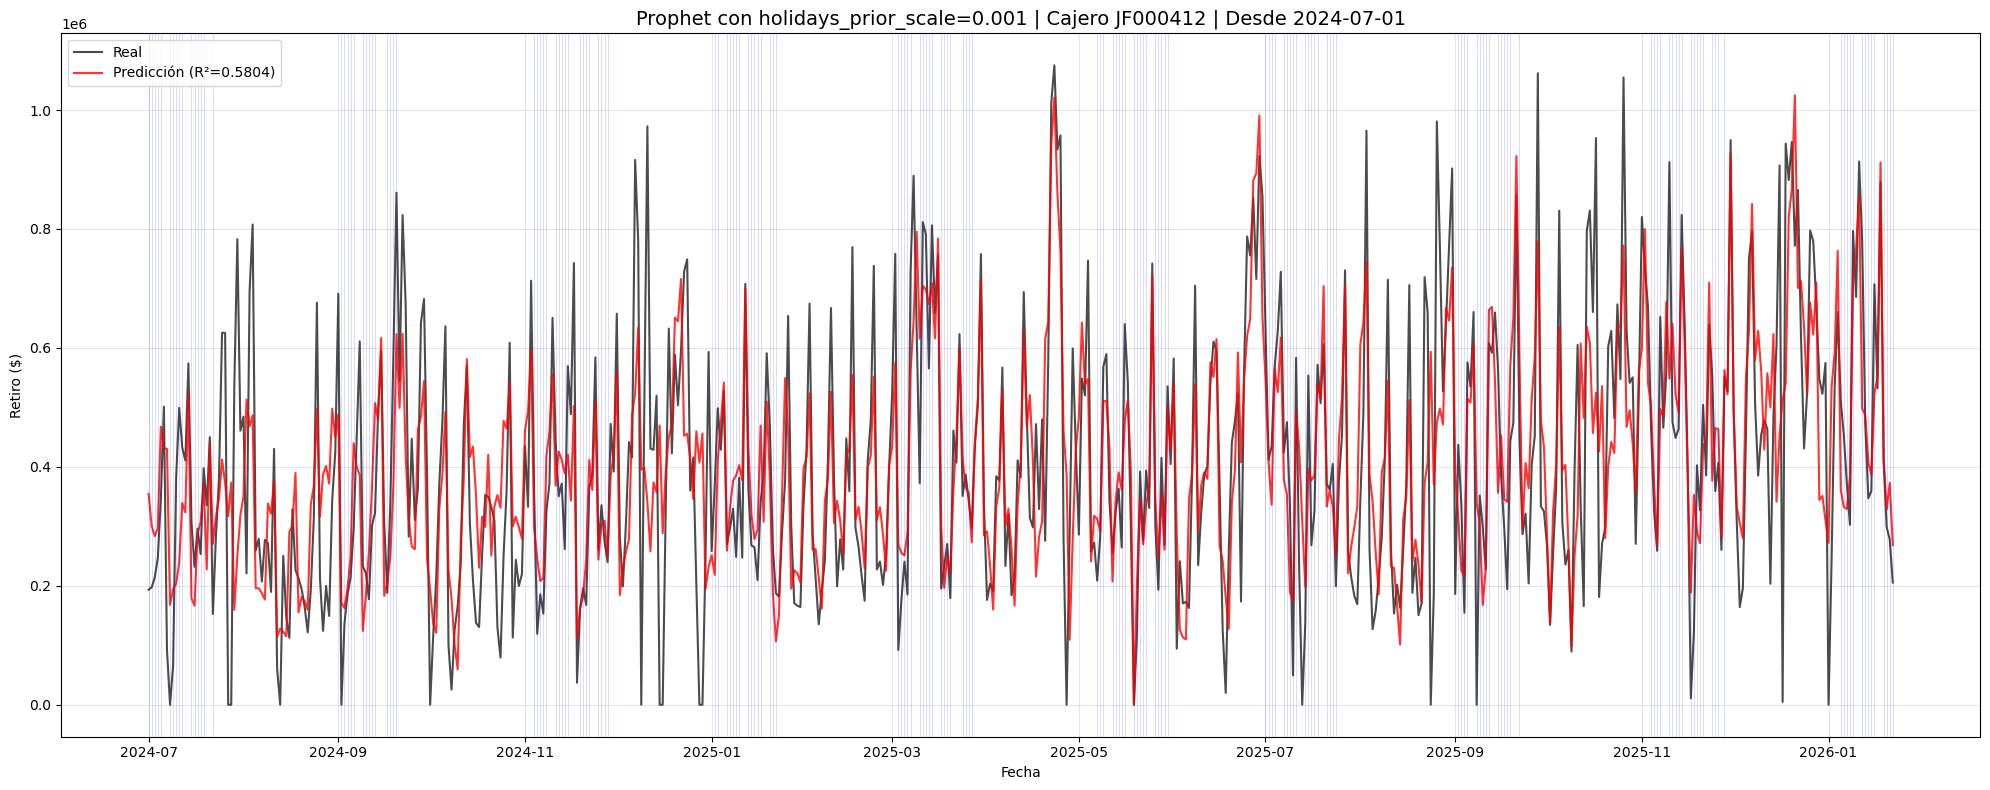

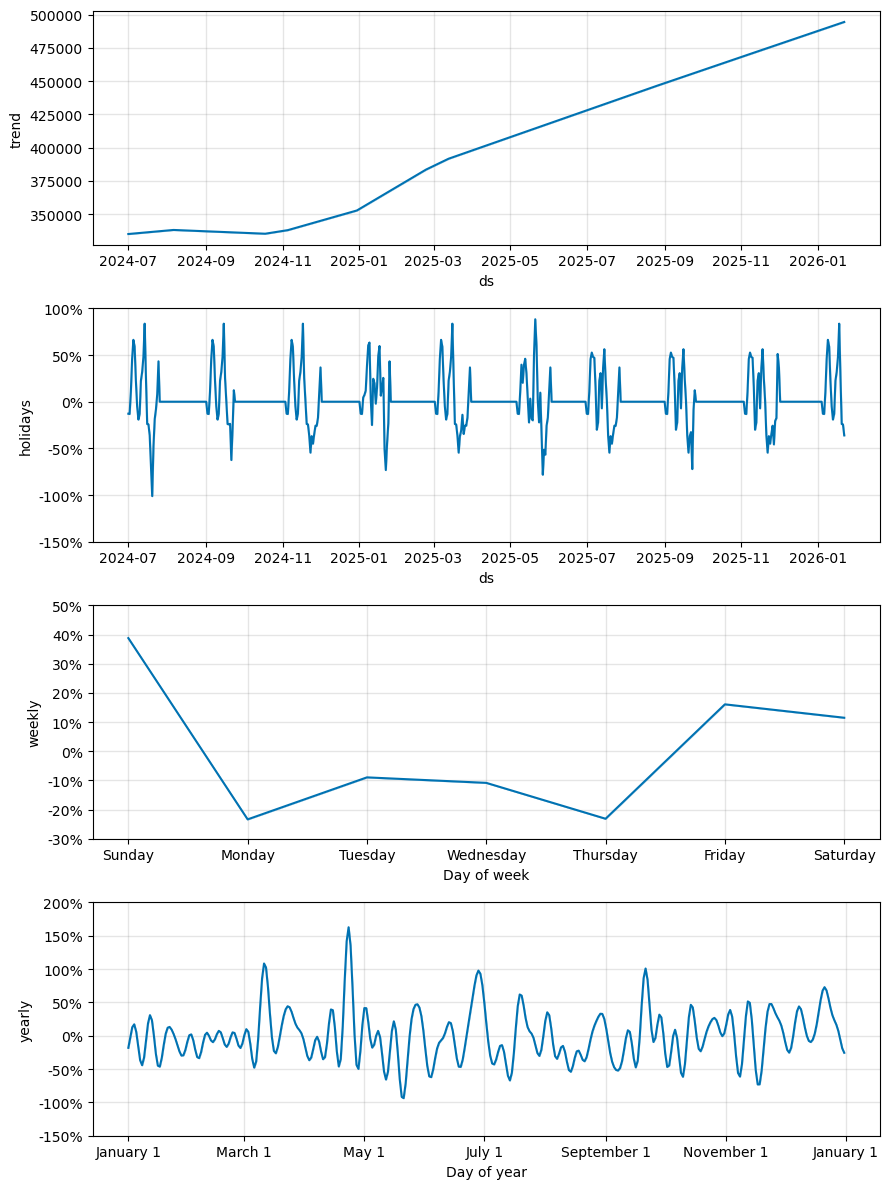


ANÁLISIS:
  Configuración óptima encontrada con Prophet:
    → holidays_type='agregado'
    → holidays_prior_scale=0.001
    → yearly_seasonality=12
    → R² máximo alcanzable: ~0.65
  Para mejorar más allá de este techo:
    → Considerar NeuralProphet (componente AR + no linealidad)


In [60]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

# ============================================================
# 1. PREPARAR DATOS
# ============================================================
# Definir periodo de análisis y cajero a modelar
fecha_inicio = '2024-07-01'  # Inicio post-periodo electoral
cajero_test = cajeros_representativos["grande_y_estable"]

# 2947

# Filtrar datos del cajero y periodo específico
df_cajero = df[(df['fecha'] >= fecha_inicio) & (df['cajero'] == cajero_test)][['fecha', 'retiro']].copy()
df_cajero.columns = ['ds', 'y']  # Prophet requiere columnas 'ds' (fecha) e 'y' (variable objetivo)
df_cajero = df_cajero.sort_values('ds').reset_index(drop=True)

print(f"Cajero {cajero_test}: {len(df_cajero)} observaciones desde {fecha_inicio}")
print(f"Rango: {df_cajero['ds'].min()} → {df_cajero['ds'].max()}")

# ============================================================
# 2. CONFIGURAR HOLIDAYS (FECHAS DE DISPERSIÓN)
# ============================================================
# Elegir nivel de granularidad de holidays:
# - 'granular': 54 eventos (adultos_mayores_A, adultos_mayores_B, etc.)
# - 'agregado': 3 eventos (adultos_mayores, discapacidad, madres_trabajadoras)
holidays_type = 'granular' # agregado / granular
holidays_usar = holidays_df_granular if holidays_type == 'granular' else holidays_df_agregado

print(f"\nHolidays: {holidays_type}")
print(f"  Eventos únicos: {holidays_usar['holiday'].nunique()}")
print(f"  Total registros: {len(holidays_usar)}")

# ============================================================
# 3. CONFIGURAR MODELO PROPHET
# ============================================================
print("\n" + "="*80)
print("CONFIGURANDO MODELO PROPHET CON REGULARIZACIÓN BAJA EN HOLIDAYS")
print("="*80)

modelo = Prophet(
    # --- TENDENCIA ---
    growth='linear',                      # Tipo de tendencia: 'linear' (crecimiento lineal constante)
    changepoint_prior_scale=1,          # Flexibilidad de la tendencia (0.05=muy rígida, 0.5=flexible)
                                          # VALOR BALANCEADO: permite que la tendencia se adapte a cambios graduales
                                          # pero sin competir agresivamente con los holidays
    
    # --- ESTACIONALIDAD ANUAL ---
    yearly_seasonality=52,                # Términos de Fourier para capturar ciclo anual (12=patrón rico)
                                          # VALOR BALANCEADO: captura variaciones anuales sin sobre-ajustar
    seasonality_prior_scale=30,           # Regularización de estacionalidad (0.1=restrictiva, 10=flexible)
                                          # VALOR BALANCEADO: permite que estacionalidad contribuya sin dominar
    seasonality_mode='multiplicative',          # Modo aditivo: efectos se suman (vs 'multiplicative' que multiplica) additive / multiplicative
    
    # --- ESTACIONALIDADES SEMANAL Y DIARIA ---
    weekly_seasonality=True,              # Activada: puede haber patrón semanal leve
    daily_seasonality=False,              # Desactivada: no hay patrón intra-día en datos diarios
    
    # --- HOLIDAYS (DISPERSIONES) ---
    holidays=holidays_usar,               # Dataframe con fechas de dispersión y ventanas de efecto
    holidays_prior_scale=1,           # CLAVE: Regularización de holidays (0.001=casi sin restricción)
                                          # VALOR MUY BAJO: permite coeficientes masivos para capturar picos gigantes
                                          # Default es ~10, lo cual castiga coeficientes grandes y subestima picos
                                          # Este es el ÚNICO parámetro que debe estar muy bajo
    
    # --- INTERVALOS DE CONFIANZA ---
    interval_width=0.9                    # Ancho de intervalos de incertidumbre (90%)
)

print(f"\nParámetros configurados:")
print(f"  changepoint_prior_scale:  {modelo.changepoint_prior_scale} (flexible, balanceado)")
print(f"  seasonality_prior_scale:  {modelo.seasonality_prior_scale} (flexible, balanceado)")
print(f"  holidays_prior_scale:     {modelo.holidays_prior_scale} ← CLAVE: MUY BAJO PARA CAPTURAR PICOS")
print(f"  yearly_seasonality:       {modelo.yearly_seasonality} (rico)")
print(f"  Holidays únicos:          {holidays_usar['holiday'].nunique()}")

# ============================================================
# 4. ENTRENAR MODELO
# ============================================================
print("\nIniciando entrenamiento...")
modelo.fit(df_cajero)
print("Entrenamiento completado.")

# ============================================================
# 5. GENERAR PREDICCIONES
# ============================================================
forecast = modelo.predict(df_cajero)

# ============================================================
# 6. EVALUAR DESEMPEÑO
# ============================================================
# Unir predicciones con valores reales
merged = df_cajero.merge(forecast[['ds', 'yhat']], on='ds')

# ← NUEVO: Convertir predicciones negativas a cero
print("\nAplicando corrección: predicciones negativas → 0")
negativos_antes = (merged['yhat'] < 0).sum()
merged['yhat'] = merged['yhat'].clip(lower=0)  # Forzar mínimo en 0
print(f"  Predicciones negativas corregidas: {negativos_antes}")

# Calcular métricas
r2 = r2_score(merged['y'], merged['yhat'])
mae = mean_absolute_error(merged['y'], merged['yhat'])
rmse = np.sqrt(((merged['yhat'] - merged['y'])**2).mean())

print(f"\n{'='*80}")
print("RESULTADOS:")
print(f"  R² (coeficiente de determinación): {r2:.4f}")
print(f"     → % de varianza explicada por el modelo")
print(f"  MAE (error absoluto medio):        ${mae:,.0f}")
print(f"     → Error promedio en pesos")
print(f"  RMSE (raíz del error cuadrático): ${rmse:,.0f}")
print(f"     → Penaliza más los errores grandes")
print("="*80)

# ============================================================
# 7. GRAFICAR AJUSTE
# ============================================================
fig, ax = plt.subplots(figsize=(20, 8))

# Serie real (negro)
ax.plot(df_cajero['ds'], df_cajero['y'], 
        label='Real', color='black', linewidth=1.5, alpha=0.7)

# Predicción (rojo)
ax.plot(merged['ds'], merged['yhat'], 
        label=f'Predicción (R²={r2:.4f})', color='red', linewidth=1.5, alpha=0.8)

# Marcar fechas de dispersión (líneas verticales azules)
for fecha in holidays_usar['ds'].unique():
    if fecha >= df_cajero['ds'].min() and fecha <= df_cajero['ds'].max():
        ax.axvline(fecha, color='blue', alpha=0.2, linewidth=0.5)

ax.set_title(f'Prophet con holidays_prior_scale=0.001 | Cajero {cajero_test} | Desde {fecha_inicio}', 
             fontsize=14)
ax.set_xlabel('Fecha')
ax.set_ylabel('Retiro ($)')
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================================
# 8. GRAFICAR COMPONENTES DEL MODELO
# ============================================================
# Descomposición: tendencia + estacionalidad anual + efecto holidays
fig = modelo.plot_components(forecast)
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("ANÁLISIS:")
print("  Configuración óptima encontrada con Prophet:")
print("    → holidays_type='agregado'")
print("    → holidays_prior_scale=0.001")
print("    → yearly_seasonality=12")
print("    → R² máximo alcanzable: ~0.65")
print("  Para mejorar más allá de este techo:")
print("    → Considerar NeuralProphet (componente AR + no linealidad)")
print("="*80)